## Estimating Probabilities

### Introduction

Science and engineering have seen amazing progress over the last few centuries. We are now able to launch a spacecraft from Earth and predict it will arrive on Mars at a certain time and location. However, it looks like not everything is as easy to predict as the trajectory of a spacecraft.

Take tossing a coin, for instance — as ridiculous as it may sound, we're not able to predict with certainty whether the coin is going to land on heads or tails. And that's because a coin toss is a very complex phenomenon. The outcome depends on mutiple factors — the strength and the angle of the toss, the friction of the coin with air, the landing angle, the surface the coin lands on, etc.

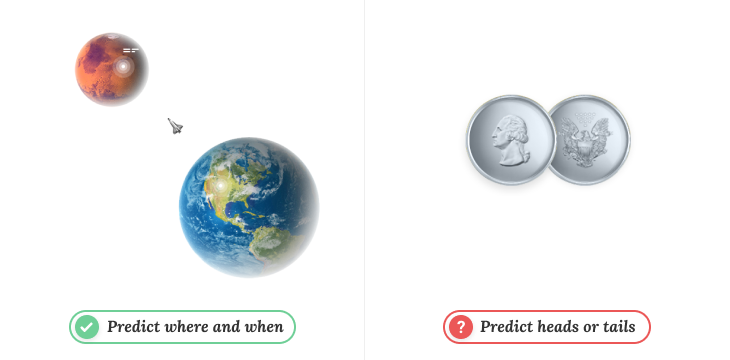

Although we can't tell beforehand the outcome of a coin toss, we'll learn in this course that we're able to at least estimate the probability (the chances) of a coin landing on heads or tails. This may sound like a limitation, and in a way it is, but estimating probabilities is an extremely powerful technique that can enable us to build non-trivial applications, including:

- Image recognition systems (used for self-driving cars, medical diagnosis, etc.)
- Spam filters for inboxes
- Statistical hypothesis tests

Throughout this course, we'll learn:

- How to estimate probabilities theoretically and empirically.
- What are the fundamental rules of probability.
- Counting techniques — tree diagrams, the rule of product, permutations, and combinations.

Let's start with estimating the probability of a coin landing heads up

## The Empirical Probability

In the previous screen, we talked about the difficulty of predicting the outcome of a coin toss. Whenever we can't predict outcomes with certainty, we're dealing with a random experiment.

The toss of a coin is a random experiment, just like drawing lottery numbers or rolling a die. The term "experiment" might make you think about science, but the term here has a wider meaning — a random experiment is any process for which we can't predict outcomes with certainty.

Although we can't predict the outcome of a random experiment, we can at least estimate the probability (the chances) associated with its outcomes. A coin toss has two possible outcomes, and we can estimate the probability associated with the coin landing on heads or tails.

Let's say we're interested in estimating the probability of a coin landing on heads. To estimate the probability, we can take the following steps:

- Toss the coin many times (thus repeating the random experiment).
- Count the number of times the coin landed on heads.
- Divide the number of heads by the total number of times we tossed the coin.

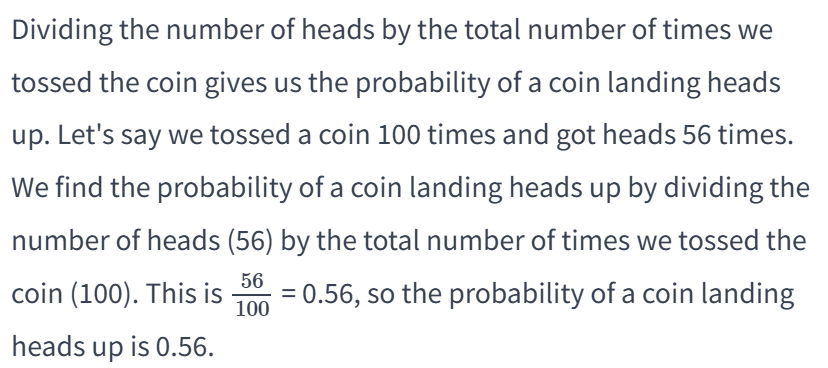

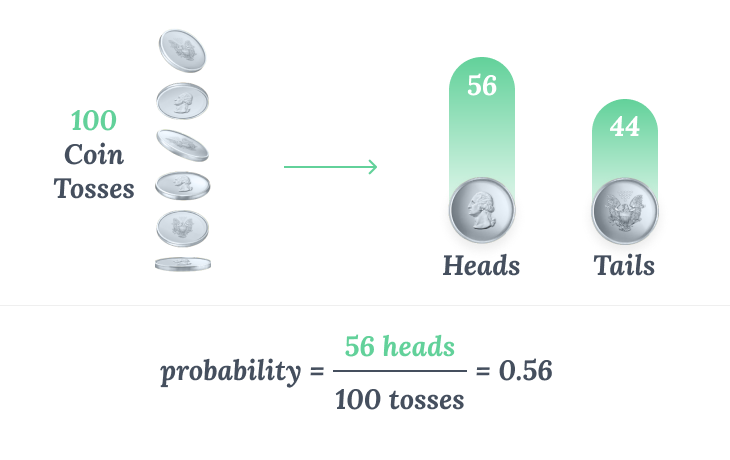

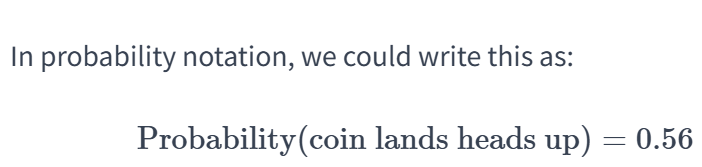

We read the mathematical expression above as "the probability of the event coin lands heads up is 0.56." For simplicity, the notation is often compressed, and "Probability" becomes "P", while "coin lands heads up" becomes simply "heads" or H:

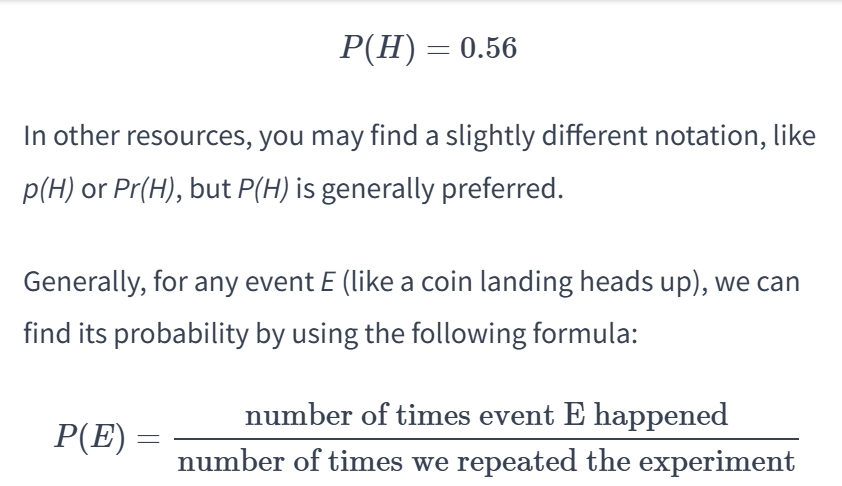

When we calculate the probability of an event by performing an experiment one or more times, we calculate the experimental — or empirical probability — of the event. Later in this lesson, we'll learn a different way of estimating probabilities, but for now let's stop for a few exercises and resume our discussion in the next screen.

1. Just like in our example above, we tossed a coin 100 times and got heads 56 times. Calculate the probability of getting tails using the formula above and assign the result to p_tail.
2. We rolled a regular six-sided die 200 times and:
We got a six 28 times. Calculate the probability of getting a 6 when rolling a six-sided die. Assign the result to p_six.
We got an odd number (a 1, a 3, or a 5) 102 times. Calculate the probability of getting an odd number when rolling a six-sided die. Assign the result to p_odd.
3. Print p_tail, p_six, and p_odd to examine the probabilities.

In [2]:
p_tail = 44 / 100

p_six = 28 / 200

p_odd = 102 / 200

print(p_tail)
print(p_six)
print(p_odd)

0.44
0.14
0.51


## Probability as Relative Frequency

In the example we used in the previous screen, we divided the number of heads by the number of times we tossed the coin to find the empirical probability of H (coin lands heads up):

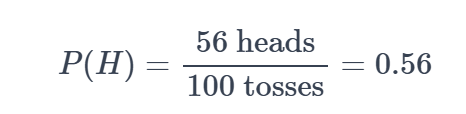

Notice, however, that 0.56 represents the proportion of heads from the total number of tosses. As we've learned in a previous lesson, we can convert proportions to percentages:

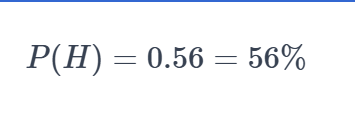

This tells us that the empirical probability of an event is nothing but the relative frequency (proportion or percentage) of that event with respect to the total number of times the experiment was performed.

Using percentages gives us a more intuitive understanding of what a probability value really is. For instance, P(H) = 56% tells us that for any coin toss, there's a 56% chance the coin will land heads up. So just before we're about to toss a coin, we may not be able to predict the outcome, but at least we know there's a 56% chance the coin will land heads up.

Let's do a few more exercises and resume the discussion on the next screen.

1. We tossed a coin 300 times and got tails 162 times.
    - Find the probability of getting heads. Assign your result to p_heads_1.
    - Transform the probability in p_heads_1 to a percentage value. Assign the result to percentage_1.

2. In a different trial, we tossed a coin 5,000 times and got tails 2,450 times.
    - Find the probability of getting heads. Assign your result to p_heads_2.
    - Transform the probability in p_heads_2 to a percentage value. Assign the result to percentage_2.

In [3]:
p_heads_1 = (300 - 162) / 300

percentage_1 = p_heads_1 * 100

p_heads_2 = (5000 - 2450) / 5000

percentage_2 = p_heads_2 * 100

## Repeating an Experiment

In the previous exercise, we tossed a coin 300 times, and found that P(H) = 46%. Then, we tossed a coin 5,000 times and found that P(H) = 51%. But if different number of tosses give different probability values, then what's the true value of P(H)?

To answer this question, we're going to do a thought experiment where we assume we already know that the true probability of P(H) is 50%. We'll also assume the chances are the same for getting tails, so P(T) = 50% (P(T) is an abbreviation for P(Tails)).

Using these assumptions, we're going to use Python to simulate a coin toss 10,000 times and watch how P(H) evolves as the number of tosses increases. We begin by writing a function named coin_toss() that can simulate a single coin toss:

In [19]:
from numpy.random import seed, randint
seed(1)
def coin_toss():
    if randint(0, 2) == 1:
        return 'HEAD'
    return 'TAIL'

coin_toss()

'HEAD'

In the code above:

- We used the [seed() function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) to set a random seed for reproducibility (we covered reproducibility and random seeds in a previous lesson).
- We used the [randint(0, 2) function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to generate randomly either a 0 or a 1 (2 won't be included). Because randint() generates numbers randomly, there's a 50% chance to get a 0 and 50% chance to get a 1 — this helps us introduce in our code a logic for P(H) = 50% and P(T) = 50%.
- If randint(0, 2) returns 1, our coin_toss() function returns 'HEAD', otherwise it returns 'TAIL'.

Now let's repeat the experiment 10,000 times in the exercise below. On the next screen, we'll analyze the results using a line plot and see how P(H) evolves as the number of tosses increases. Remember that the point of this experiment is to help us understand the true value of P(H).

In [23]:
# INITIAL CODE
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads += 1
    current_probability = heads / n
    probabilities.append(current_probability)


probabilities[:10]

[1.0,
 1.0,
 0.6666666666666666,
 0.5,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.7777777777777778,
 0.7]

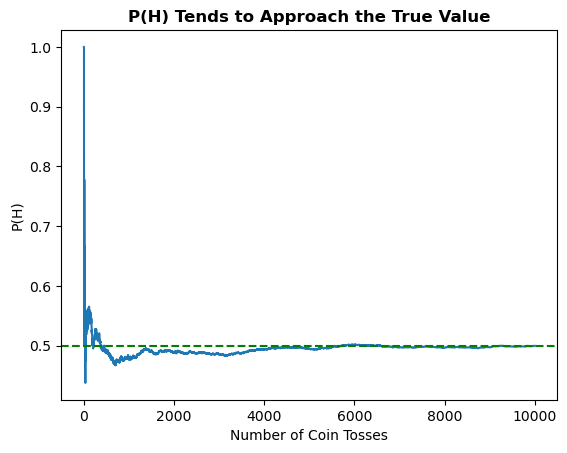

In [35]:
import matplotlib.pyplot as plt

plt.plot(list(range(1, 10001)), probabilities)
plt.axhline(0.5, linestyle='dashed', color='Green')
plt.xlabel('Number of Coin Tosses')
plt.ylabel('P(H)')
plt.title('P(H) Tends to Approach the True Value', weight='bold')
# plt.legend()
plt.show()

## The True Probability Value

In the previous exercise, we repeated a coin toss 10,000 times, and saved the results at the end of each toss. Using the probabilities we stored in the probabilities list, we created the line plot below, which shows the evolution of P(H) as the number of coin tosses increases.

Above, we see that for the first 1,000 tosses or so, the value of P(H) varies a lot, with a maximum of 1.0 and a minimum of approximately 0.45. However, as the number of tosses increases, the value of P(H) tends to stabilize.

Interestingly enough, P(H) stabilizes around the true value of P(H), which we assumed to be P(H) = 50% = 0.50 on the last screen. This suggests that the greater the number of coin tosses, the closer P(H) gets to the true value. If we take a look at the last few probabilities and round them all to two decimal places, we can see the values are all 0.50 (the values below are not yet rounded to two decimal places):

In [36]:
probabilities[-5:]

[0.4992997198879552,
 0.49934980494148246,
 0.4993998799759952,
 0.49934993499349933,
 0.4994]

This gives us some insight into our initial question, which was: if different numbers of tosses give different probability values, then what's the true value of P(H)? The true P(H) is given by the relative frequency (expressed as proportion or percentage) of heads as the number of coin tosses increases without bound — the more we repeat the toss, the closer we should be to the true probability.

Generally, the probability of an event (a coin landing heads up, getting a 5 when we roll a die, etc.) approaches the true probability value as the number of trials of the random experiment (a coin toss, the rolling of a die, etc.) increases without bound.

So far, we've only focused on empirical probabilities. On the next screen, we'll look at a different technique to estimate probabilities — a technique you might be more familiar with. For the next exercise, we're going to leave aside the coin toss experiment and consider a more practical example.

An insurance company conducted a study with 200 individuals, and found that:

- 87 individuals opted for at least a life insurance policy.
- 40 individuals opted for at least life and car insurance policies.
- 63 individuals opted for at least a house insurance policy.
- 160 individuals opted for at least one type of insurance policy.
We can't predict people's choices with certainty, so an individual choosing to buy an insurance policy is a random experiment. 200 individuals were part of the study, so you can consider the random experiment was performed 200 times. Find:

1. P(L): The probability that a new customer opts for at least a life insurance. Assign your answer to a variable named p_l.
2. P(L and C): The probability that an individual opts for at least a life and a car insurance policy. Assign your answer to a variable named p_l_and_c.
3. P(H): The probability that an individual opts for at least a house insurance policy. Assign your answer to a variable named p_h.
4. P(NO): The probability that an individual opts for no insurance at all. Assign your answer to a variable named p_no.

In [37]:
p_l = 87 / 200

p_l_and_c = 40 / 200

p_h = 63 / 200

p_no = (200 - 160) / 200

## The Theoretical Probability

So far, we learned we need to perform an experiment to estimate probability values. We also said that a probability value estimated by performing an experiment is called empirical (or experimental) probability. To find the empirical probability of any event E (like a coin landing heads up), we learned to use the formula:



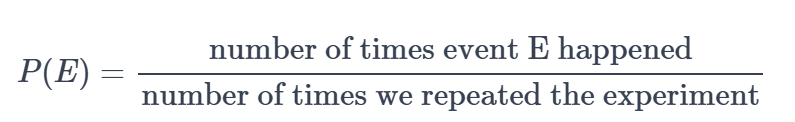

However, properly calculating empirical probabilities requires us to perform a random experiment many times, which may not always be feasible in practice. An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have equal chances of occurring. This allows us to use the following formula to calculate the probability of an event E:

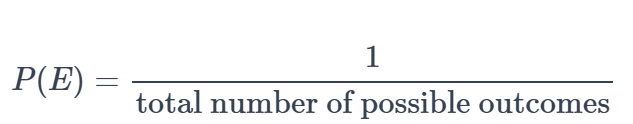

For instance, the total number of possible outcomes for a coin toss is two: heads or tails. Let H be the event that a coin lands on heads, and T the event that a coin lands on tails. We can use the formula above to find P(H) and P(T):

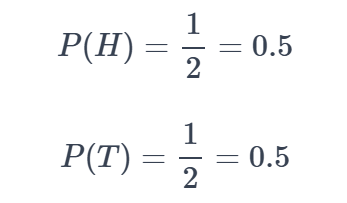

Let's also consider the rolling of a die, where there are six possible outcomes: 1, 2, 3, 4, 5 or 6. Assuming each outcome has the same chance of occurring, the probability of getting a 2 or a 4 is:

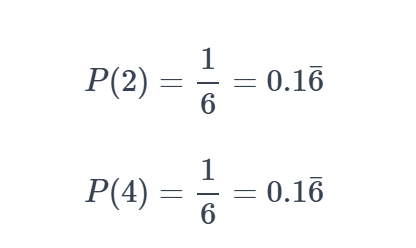

When we calculate the probability of an event under the assumption that the outcomes have equal chances of occurring, we say that we're calculating the theoretical probability of an event.

Theoretical probabilities are much easier to calculate, but in practice it doesn't always make sense to assume the outcomes of a random experiment have equal chances of occurring. If you were playing the lottery, it wouldn't be reasonable to assume that the two possible outcomes (you win or you don't) have equal chances.

If you were a scientist trying to calculate the probability of a human becoming infected with the HIV virus, it wouldn't be reasonable to assume the two possible outcomes (becoming infected with HIV or not) have equal chances of occurring. Both theoretical and empirical probabilities are helpful and important in practice.

On the next two screens, we'll discuss some important exceptions to the new formula we introduced above. First, let's practice calculating theoretical probabilities. For the exercises below, assume that all outcomes have equal chances of occurring.

1. Find the theoretical probability of getting a 5 when rolling a six-sided die. Assign your answer to p_5.
2. Tossing a coin twice has four possible outcomes (assume all the outcomes are equally likely):
    - Heads on the first toss and heads on the second toss (HH).
    - Heads on the first toss and tails on the second (HT).
    - Tails on the first toss and heads on the second (TH).
    - Tails on the first toss and tails on the second (TT).
3. Find:
    - P(HT): Assign your result to p_ht.
    - P(TT): Assign your result to p_tt.

In [40]:
p_5 = 1/6

p_ht = 1/4
p_tt = 1/4

## Events vs. Outcomes

So far, we've repeatedly used the terms "event" and "outcome," and we need to add a few clarifications. An outcome is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are 1, 2, 3, 4, 5, and 6. An event, however, has a richer meaning and can include more than one outcome (or even zero outcomes):

- The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes 1, 3, and 5.
- The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes 2, 3, and 4.
- The event that we'll get a number greater than 20 when we roll a six-sided die — this event doesn't include any of the possible outcomes corresponding to rolling a six-sided die.

Although an event can include a single outcome (like the event of getting a 2 when we roll a die), the two concepts still have a different meaning. We always assign probabilities to events, not outcomes, even if the event includes only one outcome.

On the previous screen, we learned we can use this formula to compute the theoretical probability of an event:

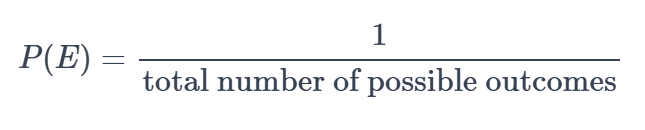

However, we can't use this formula to compute theoretical probabilities for events that include more than one outcome. Take the event that we'll get any number between 1 and 6 (both included) when rolling a six-sided die. The outcomes are 1, 2, 3, 4, 5, and 6, so there are 100% chances we'll get some number between 1 and 6. Using our formula, however, we find the probability is only 
16.
¯
6
%
:

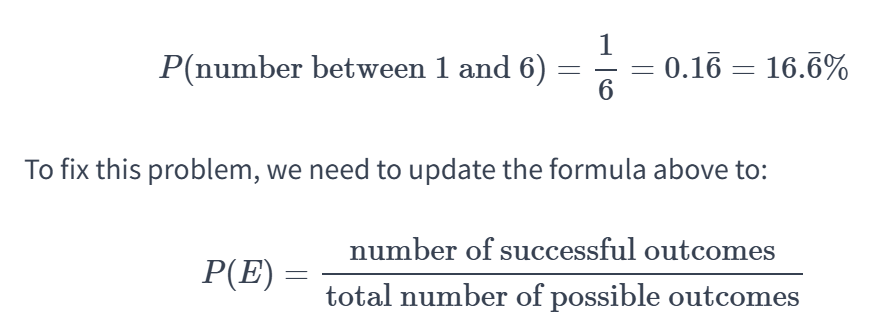

The "number of successful outcomes" part represents the number of outcomes included in the event E, and "total number of possible outcomes" is the number of possible outcomes that the random experiment associated with the event E could terminate in.

The event that we'll get an odd number when we roll a six-sided die includes three successful outcomes (1, 3, and 5), and the random experiment of rolling the die includes six possible outcomes (1, 2, 3, 4, 5, and 6). This means:

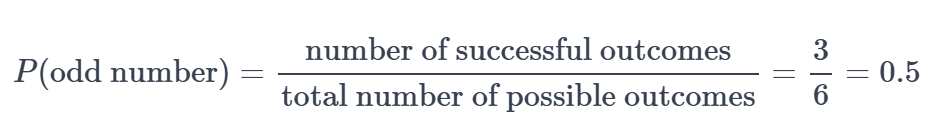

Using the updated formula, we also find that the probability of getting a number between 1 and 6 when we roll a die is 100%, just like we'd intuitively expect:



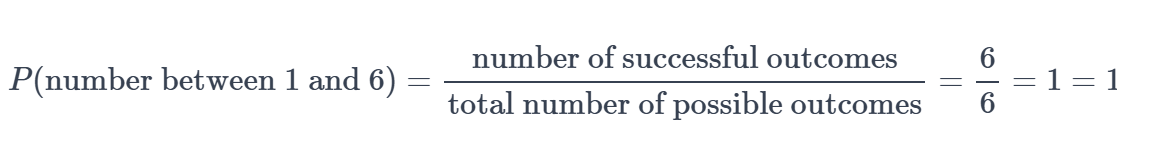

On the next screen, we'll discuss more about the formula we just learned. Let's now do a few exercises.

1. Assume all the outcomes of rolling a six-sided die have an equal chance of occuring. Calculate as proportion the probability of the following events:
    - We get an even number — assign your answer to p_even.
    - We get an odd number different than 3 — assign your answer to p_odd_no_3.
    - We get an odd number greater than 5 — assign your answer to p_odd_greater_5.

In [41]:
p_even = 3 / 6

p_odd_no_3 = 2/ 6

p_odd_greater_5 = 0 / 6

## A Biased Die

On the last screen, we came to the conclusion that we can use this formula to compute theoretical probabilities:

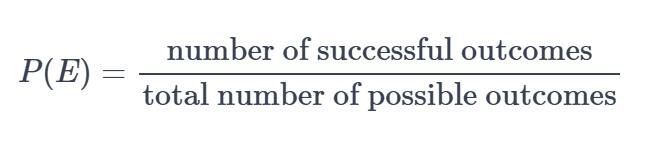

However, let's say we have a biased six-sided die which has a 6 on three of its sides, and 1, 3, and 5 on the rest of the sides.

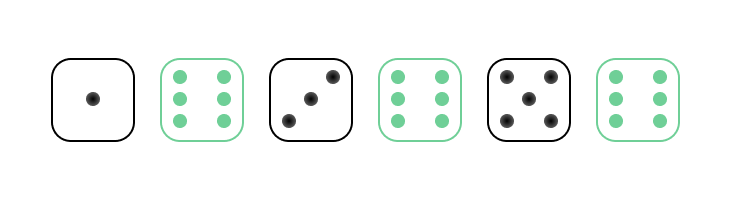


To be able to use the formula above, we need to take into account that 6 shows up on three sides. To do that, we treat each 6 as a different outcome and say that for this biased die the possible outcomes are 1, 3, 5, 6, 6 and 6.

Since we treat each 6 as a different outcome, the event "getting a 6" has three successful outcomes: 6, 6 and 6. This means that the probability of getting a 6 is:

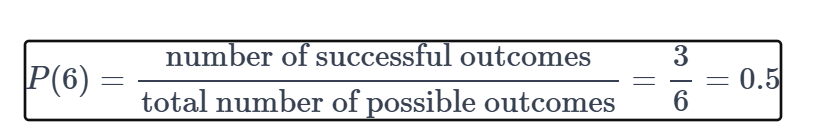

The event "getting a 3" has only one successful outcome, and the event "getting a 2" has no successful outcome, which leads to:

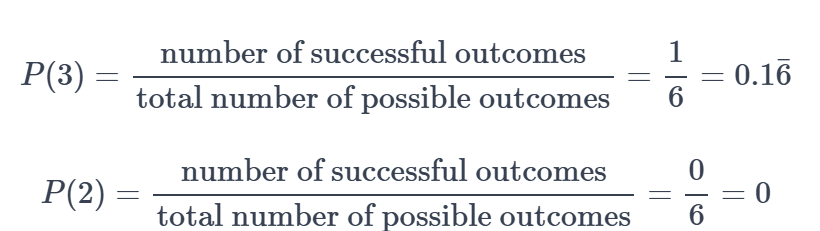

If we didn't treat each 6 differently and said it doesn't matter which side a 6 is on, we'd be forced to conclude the only possible outcomes are 1, 3, 5 and 6. We can definitely frame the problem like that, but the formula above won't work anymore — we see below P(6) becomes the same as P(3), but, intuitively, P(6) should be higher than P(3) since the die has 6 on three of its sides:

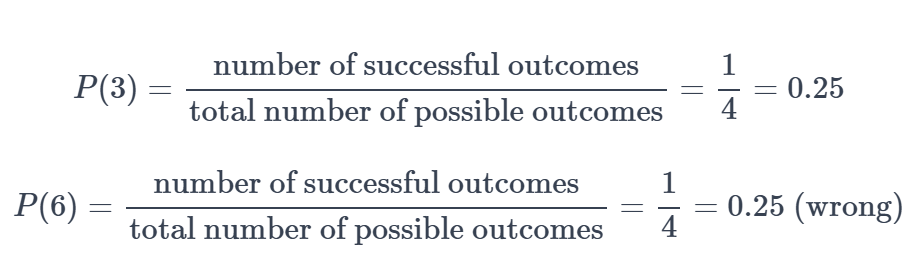

The formula doesn't work anymore because the assumption of equally likely outcomes is violated — in this case, 6 has more chances of occurring than the other outcomes.

The take-home message here is that the formula above works under the assumption that the outcomes have equal chances of occuring. If the assumption is violated, the formula will output wrong probability values. Let's consider a similar case in the exercise below.

1. In a jar of 100 marbles, 90 marbles are red and 10 are blue. Find as a proportion:
    - The probability of randomly selecting a blue marble from the jar — assign your answer to p_blue.
    - The probability of randomly selecting a red marble from the jar — assign your answer to p_red.

In [42]:
 p_blue = 10 / 100

p_red = 90 / 100

We created a set of extra practice problems for this lesson, and you can find them at this link. Practice problems are optional and won't affect your progress if you skip them.


In this first lesson on probability, we learned:

- How to calculate empirical probabilities.
- How to calculate theoretical probabilities.
- The difference between events and outcomes.
In the next lesson, we'll learn more probability concepts that will give us a much better understanding of the probability theory.

At this stage in our probability course, we focus more on simple examples (like a coin toss or rolling a die) to help you understand the concepts more easily. However, as soon as we advance, we'll start using real data sets and introduce realistic examples. We'll also use the concepts taught here to build hypothesis tests and machine learning models later on.

## Random Experiments

This practice problem set contains exercises for the Estimating Probabilities lesson, which is part of the Probability: Fundamentals course. We recommend that you complete the associated lesson before attempting these practice problems.

This lesson is optional and won't affect your progress if you skip it — you can still complete the Probability: Fundamentals course if you don't complete the practice problems lessons.

Practice problems give you an opportunity to further retain and recall what you learned in the lesson. They'll also help you make connections between facts, which is better than just knowing the facts in isolation.

We're going to start with a few exercises about theory, then we'll continue with solving probability problems.

1. Using probability, we can predict the outcome of any random experiment with 100% certainty. Assign the boolean True or False to sentence_1.
2. We can encounter random experiments only in science. Assign the boolean True or False to sentence_2.
3. Although we can't predict the outcome of a random experiment, we can at least try to estimate the probability associated with its outcomes. Assign the boolean True or False to sentence_3.

In [43]:
sentence_1 = False
sentence_2 = False
sentence_3 = True

## Theoretical and Empirical Probabilities

On the previous screen, we answered a few questions about random experiments. We'll continue with practice problems about empirical and theoretical probabilities.

Generally, for any event E (like a coin landing heads up), we can find its empirical probability by using the following formula:

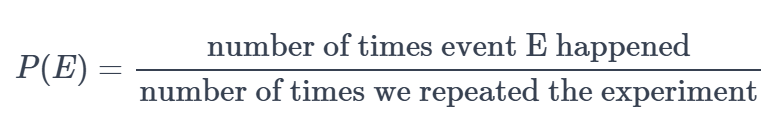

Generally, for any event E, we can find its theoretical probability by using the following formula:

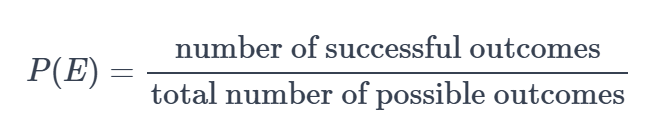

Let's implement these two formulas using Python code.

We defined two functions in the code editor: empirical_probability() theoretical_probability().

1. Compare the functions with the formulas we learned and correct the functions if necessary. For answer checking purposes, don't change the name of the functions.

2. An experiment was performed 550 times and the event of interest occurred 10 times. Use empirical_probability() to calculate the empirical probability of this event.

    - Assign your answer to emp_probability.
3. An experiment has 16 possible outcomes. The number of successful outcomes for an event of interest is 4. Assume all outcomes have the same chance of occurring and calculate the theoretical probability of this event using theoretical_probability().

    - Assign your answer to th_probability.

In [44]:
# INITIAL CODE
def empirical_probability(x, n_experiments):
    return x /n_experiments

def theoretical_probability(y, n_outcomes):
    return y/n_outcomes


In [45]:
 empirical_probability(10, 550)

0.01818181818181818

In [46]:
theoretical_probability(4, 16)

0.25

## Probabilities, Events, and Outcomes

On the previous screen, we wrote the empirical and theoretical probability formulas using Python functions.

Next, we're going to look at some theoretical questions about empirical probability, theoretical probability, outcomes, and events.

Evaluate the truth value of the following sentences.

1. In principle, the empirical probability of an event can be the same as its theoretical probability. Assign the boolean True or False to sentence_1.
2. For a coin toss, assume the chances are equal for both outcomes (heads and tails). If we repeat the coin toss 500 times, it's impossible that the coin will land heads 500 times. Assign True or False to sentence_2.
3. A fair coin (a fair coin means both heads and tails have the same chances of occurring) is tossed four times. The outcome "HHHH" (four heads in a row) has the same probability as the outcome "HTHT" (heads on the first toss, then tails, heads, and tails again). Assign True or False to sentence_3.
4. An event can correspond to zero outcomes. Assign True or False to sentence_4.
5. We assign probabilities to events, not outcomes. Assign True or False to sentence_5.

In [47]:
sentence_1 = True
sentence_2 = False
sentence_3 = True
sentence_4 = True
sentence_5 = True

## Calculating Probabilities

On the previous three screens, we focused more on theory. From this screen forward, we're going to solve probability problems.

Consider rolling a fair six-sided die (a fair die means all six outcomes have the same chance of occurring) and the following three events associated with this random experiment:

- Event A: we get an even number.
- Event B: we get either an odd or an even number greater than 4.
- Event C: we get an even number greater than 6.

In [49]:
all_outcomes = [1, 2, 3, 4, 5, 6]

A = [2, 4, 6]
B = [5, 6]
C = []

In [50]:
p_A = 3 / 6
p_B = 2 / 6
p_C = 0 / 6

## Simulating A Die Roll

Recall that we learned about empirical probability and created a function that simulates a coin toss:

In [61]:
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0, 2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'

coin_toss()

'HEAD'

In the code above:

- We used the [seed() function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html) to set a random seed for reproducibility (we covered reproducibility and random seeds in a previous lesson).
- We used the [randint(0, 2) function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) to generate randomly either a 0 or a 1 (2 won't be included). Because randint() generates numbers randomly, there's a 50% chance to get a 0 and 50% chance to get a 1 — this helps us introduce in our code a logic for P(H) = 50% and P(T) = 50%.
- If randint(0, 2) returns 1, our coin_toss() function returns 'HEAD', otherwise it returns 'TAIL'.

For the next exercise, we'll create a function that simulates a die roll.

In [68]:
seed(1)
def die_roll():
    return randint(1, 7)

die_roll()

6

In [71]:
outcomes = []

for i in range(1000):
    outcomes.append(die_roll())

outcomes[:10]

[2, 2, 1, 5, 6, 5, 6, 1, 5, 1]

In [76]:
p_6 = len([val for val in outcomes if val == 6]) / 1000
p_1 = len([val for val in outcomes if val == 1]) / 1000
p_even = len([val for val in outcomes if val % 2 == 0]) / 1000
p_6, p_1, p_even

(0.173, 0.178, 0.505)

##  Lottery Probabilities

On the previous screen, we wrote a Python function that simulates the roll of a fair six-sided die, and then we calculated a few empirical probabilities. On this screen, we're going to solve probability problems about lotteries.

One type of lottery is 6/49: six numbers are drawn at random from a set of 49 numbers in the interval [1, 2, 3, ..., 47, 48, 49].

For instance, the outcome of one draw can be (12, 20, 25, 26, 30, 40) — if your ticket has these six numbers exactly, then you win the big prize.

But (12, 20, 25, 26, 30, 40) is just one of the many outcomes. Other outcomes include:

- (4, 29, 38, 40, 43, 49)
- (18, 22, 24, 39, 45, 47)
- (1, 9, 30, 32, 39, 42)

In total, there are 13,983,816 different outcomes. Using this information, let's try to answer a few probability problems.

1. Assign the total number of different outcomes for a 6/49 lottery to a variable named total_n_outcomes.

In [77]:
total_n_outcomes = 13983816


2. Calculate the theoretical probability of winning the big prize (you win the big prize if one of your tickets matches exactly all six of the numbers drawn) by playing:

- A single ticket — assign your answer to p_1.
- Two different tickets — assign your answer to p_2.
- 100 different tickets — assign your answer to p_100.
- 6,991,908 different tickets — assign your answer to p_half.
- 13,983,816 different tickets — assign your answer to p_all

In [83]:
from itertools import combinations
len(list(combinations(range(1,50), 6)))

13983816

In [85]:
p_1 = 1 / total_n_outcomes
p_2 = 2/total_n_outcomes
p_100 = 100 / total_n_outcomes
p_half = 6991908 / total_n_outcomes
p_all = total_n_outcomes / total_n_outcomes

## Probability Rules

In the last lesson, we learned how to calculate empirical and theoretical probabilities, and introduced a few key concepts: random experiment, outcomes, and events. In this lesson, we'll build on this knowledge to learn new techniques.

Remember that a random experiment is any process for which we can't predict outcomes with certainty. An outcome is a possible result of a random experiment, while an event can include more than one outcome.

In probability theory, the outcomes of a random experiment are usually represented as a set. For example, this is how we can represent the outcomes of a die roll as a set:

Outcomes =
{
1
,
2
,
3
,
4
,
5
,
6
}

A set is a collection of distinct objects, which means each outcome must occur only once in a set:

- {Heads, Tails} is an example of a valid set because all the elements are distinct.
- {Heads, Heads} is not a proper set because two elements are identical.

Notice we also use curly braces to write a set: {Heads, Tails} is a set, while [Heads, Tails] is not a set.

In probability theory, the set of all possible outcomes is called a sample space. A sample space is often denoted by the capital Greek letter Ω (read "omega"). This is how we represent the sample space of a die roll:

Ω =
{
1
,
2
,
3
,
4
,
5
,
6
}

Let's now do a quick exercise and continue the discussion in the next screen.


We toss a normal coin two times. Find the sample space of this experiment and assign it to the list coin_toss_omega.

- One of the outcomes is heads first, tails second. Abbreviate heads as H, tails as T, and assign the string 'HT' (heads first, tails second) to the list coin_toss_omega. Repeat this pattern for the other outcomes.

In [86]:
coin_toss_omega = {'HT', 'TH', 'TT', 'HH'}

## Probability of Events

On the last screen, we learned that a sample space is a set containing all the possible outcomes of a random experiment and saw that the sample space of a die roll is:

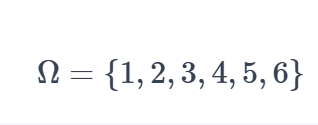

Consider the event "getting an even number when rolling a die," which we abbreviate by the letter "E". Event E corresponds to three of the outcomes we see above in the sample space Ω: 2, 4, and 6. We can also represent event E as a set:

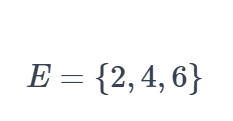

In the previous lesson, we said we assign the probability to events, not outcomes. For our event E, we have:

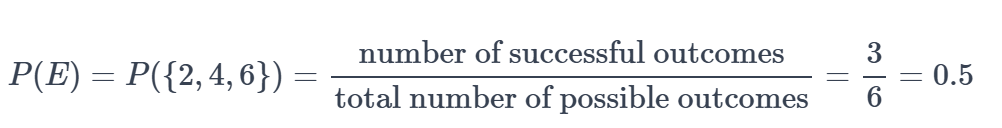

For the following exercise, we'll consider a random experiment where we roll a fair six-sided die two times ("fair" means all outcomes have equal chances of occurring). The sample space of this experiment has 36 possible outcomes (all the sequences of numbers we can get from the two throws):

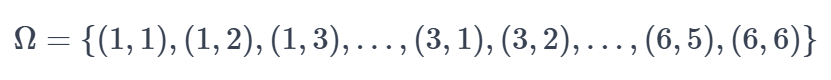

For each outcome, we sum up the two numbers and get the following sums:



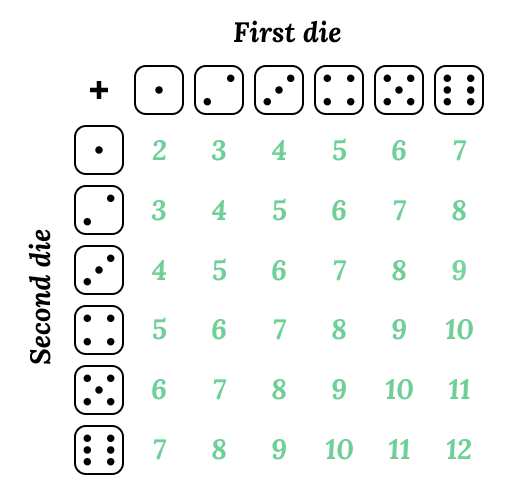


Let's now find the probability for a few events.

Use the table above to find the probability of the following events:

1. The sum of the two rolls is 6. Assign the probability to p_sum_6.
2. The sum of the two rolls is lower than 15. Assign the probability to p_lower_15.
3. The sum of the two rolls is greater than 13. Assign the probability to p_greater_13.

In [87]:
p_sum_6 = 5 / 36
p_lower_15 = 36 / 36
p_greater_13 = 0 / 36

## Certain and Impossible Events

For the last exercise, we considered rolling a fair six-sided die two times. Below, we again see the table with the sums we'd get if we added the numbers of the two rolls together.

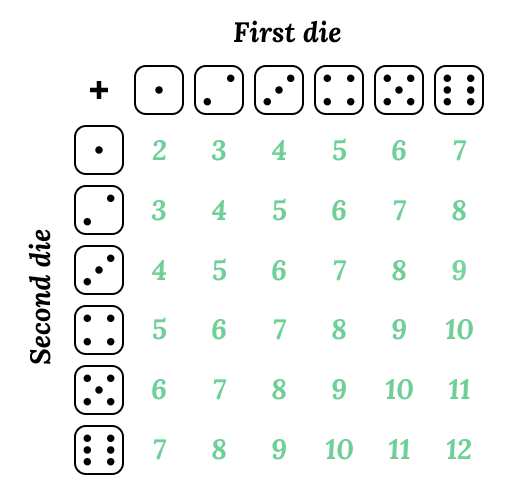

The sample space of this experiment has 36 possible outcomes — all the sequences of numbers we can get from the two throws (notice we don't consider the actual sums part of the sample space):

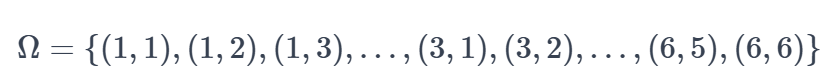

One event we considered was getting a sum greater than 13 (we'll denote this event by "A"). In the table above, we see no dice combination results in a sum greater than 12, which means event A is impossible and has no corresponding outcome in the sample space. Thus, event A corresponds to an empty set, which we denote by the symbol Ø:

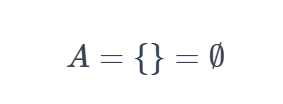

The probability of A, which is an impossible event, is 0:

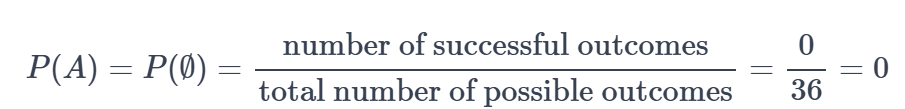

The other event we considered in the last exercise was getting a sum lower than 15 (we'll denote this event by "B"). In the table above, we see all dice combinations result in a sum that is 12 or lower, which means event B is certain to happen and contains all the elements of the sample space Ω:

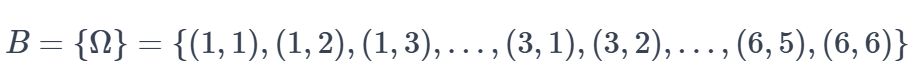

The probability of B, which is a certain event, is 1:

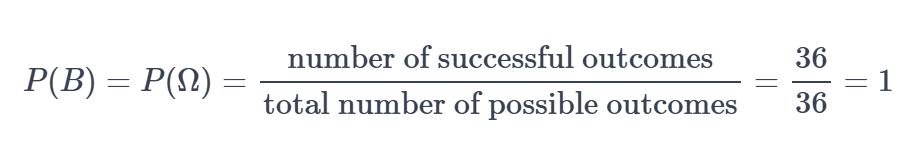

From our discussion in this screen, we can conclude:

The probability of an impossible event is 0:

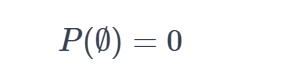

The probability of a certain event is 1:

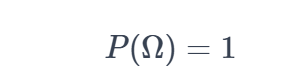

The probability of any event ranges between 0 and 1:

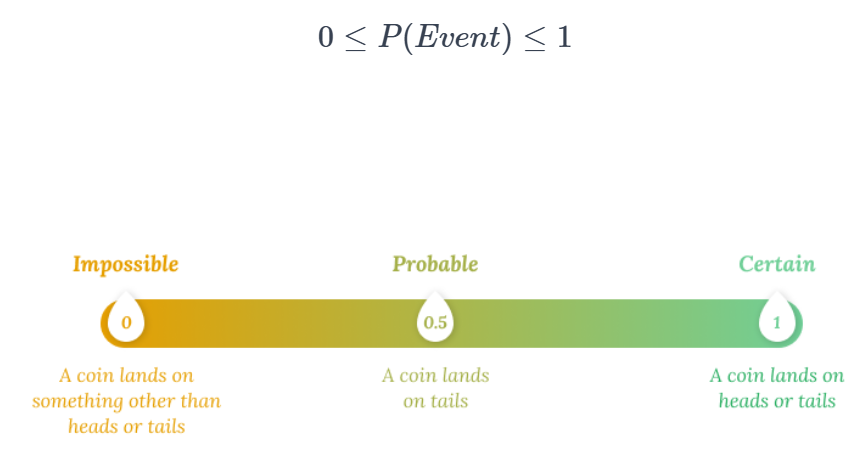

These are three important probability rules that we'll need to always keep in mind when we're solving probability problems. Let's now focus on another exercise and continue the discussion on the next screen.

Using the table above, find for the same experiment the probability of the following events:

1. The sum is either 2 or 4. Assign the probability as a proportion to p_2_or_4.
2. The sum is either 12 or 13. Assign the probability as a proportion to p_12_or_13.

In [88]:
p_2_or_4 = 4/36
p_12_or_13 = 1/36

## The Addition Rule

For rolling a fair six-sided die ("fair" means all outcomes have equal chances of occurring), consider the following two events, A and B:

- A = {3} — getting a 3
- B = {5} — getting a 5

Now, we'd like to find:

- P(A) — the probability of getting a 3
- P(B) — the probability of getting a 5
- P(A or B) — the probability of getting a 3 or a 5

The sample space of rolling a fair six-sided die is:

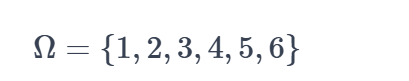

The sample space tells us that there are six total possible outcomes. With that in mind, we can use what we learned to find that:

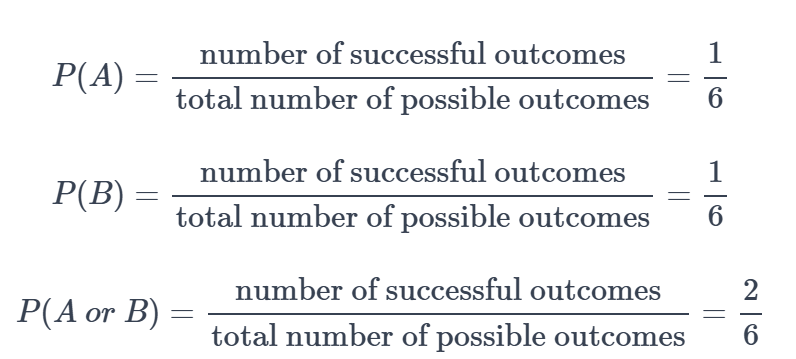

To calculate P(A or B), we can also use the formula below, which is sometimes called the addition rule:

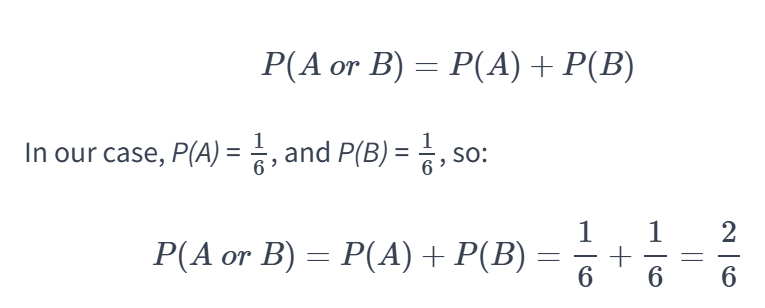

The addition rule can be extended to more than two events:

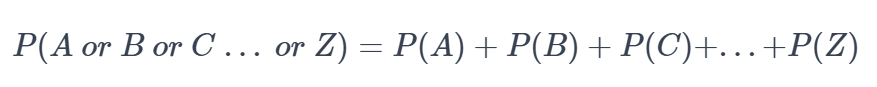

Let's do a few exercises and return to the addition rule in the next screen, where we'll discuss some exceptions. We'll need the table below again, which shows the sums we'd get if we added the numbers of two individual die rolls.

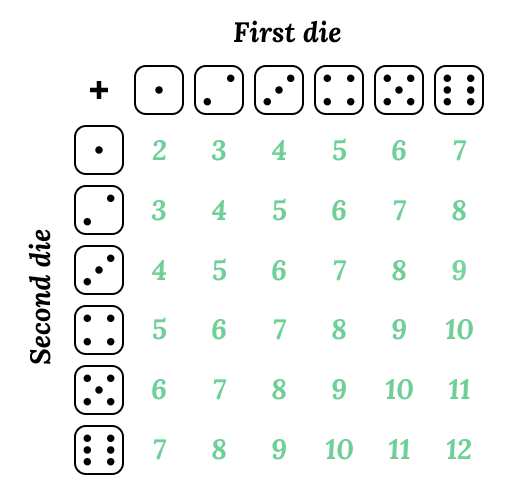


Using the addition rule, find the probability of the following events:

- The sum is either 5 or 9 — assign your answer to p_5_or_9.
- The sum is either even or less than 2 — assign your answer to p_even_or_less_2.
- The sum is either 4 or a multiple of 3 — assign your answer to p_4_or_3_multiple. Check the hint if you don't remember what a multiple is.

In [89]:
p_5_or_9 = 4/36 + 4 /36
p_even_or_less_2 = 18/ 36 + 0/36
p_4_or_3_multiple =  3/36 + 12 /36

## Venn Diagrams

On the last screen, we considered rolling a fair six-sided die, and found the probability of the following two events:

- A = {3} — getting a 3
- B = {5} — getting a 5

In probability, we can visualize events using Venn diagrams. For instance, this is how we can represent event A on a Venn diagram:

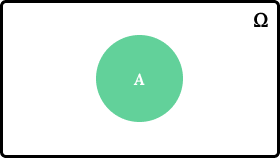

Notice we represented A as a green circle inside a rectangle. The rectangle describes the entire sample space — note the Ω sign on the right corner of the rectangle.

We can also add events A and B on the same Venn diagram:

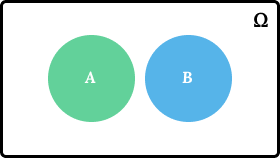

Consider also the events C and D, which are:

- C = {2, 4, 6} — getting an even number
- D = {4, 5, 6} — getting a number greater than 3

Notice that two elements, 4 and 6, belong to both C and D. To account for these two common elements, we need to represent C and D on a Venn diagram with a point of intersection:

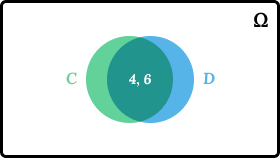

For the exercises below, we're going to calculate the probability for:

- Event C
- Event D
- Event "C or D"

Assume all outcomes have equal chances of occurring.

1. Make sure you've read the instructions above and calculate (notice that for this exercise we're considering a single die, not the sum of two dice):

    - P(C) — assign your answer to p_c.
    - P(D) — assign your answer to p_d.
2. The event "getting a number that is either even or greater than 3" corresponds to the event "C or D". Calculate:

    - P(C or D) using the addition rule — assign your answer to p_c_d_addition. Check the hint if you're not sure about the outcomes corresponding to the event "C or D".
    - P(C or D) using the formula we've been using to compute theoretical probabilities (the number of successful outcomes divided by the number of possible outcomes) — assign your answer to p_c_d_formula.
3. Print p_c_d_addition and p_c_d_formula. Why do you think we see different results (we'll explain this on the next screen)?

In [91]:
p_c = 3/6
p_d = 3/6

p_c_d_addition = p_c + p_d
p_c_d_formula =  4 / 6

## Exceptions to the Addition Rule

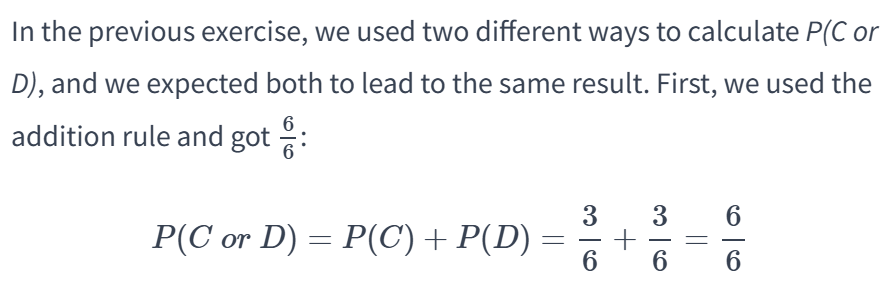

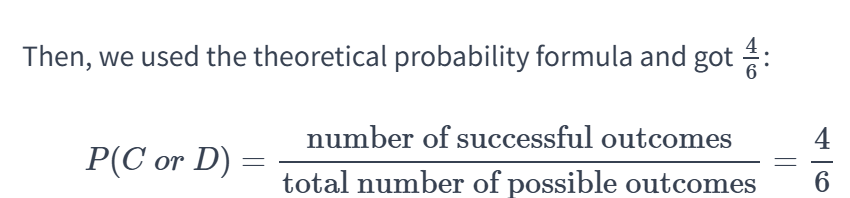

The reason we got different results is that the addition rule doesn't work for events that share corresponding outcomes. In the case of C and D, they have two outcomes in common: 4 and 6 (remember event C is getting an even number and event D is getting a number greater than 3).

To understand why the addition rule doesn't work, let's visualize events C and D on a Venn diagram again. This time, however, we're going to assume the colored areas represent probability values:

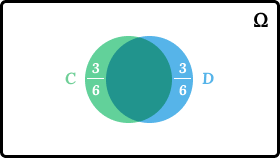

When we do P(C) + P(D), notice we add up the intersection point (the shaded area) twice:

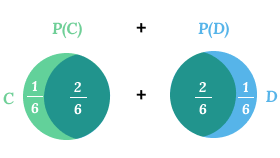

To solve the problem, we need to subtract the probability of the shaded area such that we add it only once:

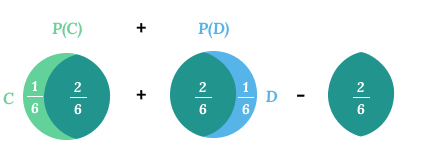

The shaded area is the point where C and D intersect, which means it's the event where both C and D happen. This corresponds to the event "getting a number that is both even and greater than 3," which has the probability:

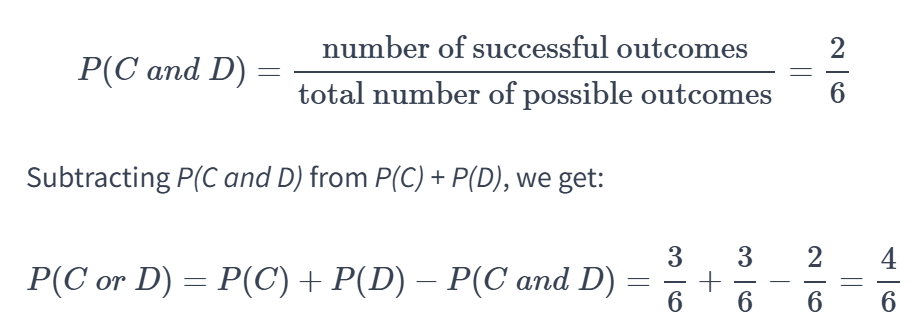

This is the same result we got from using the theoretical probability formula:

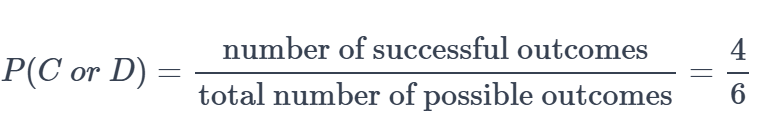

Let's do a quick exercise and discuss more about this on the next screen.

- An online betting company offers customers the possibility of betting on a variety of games and events (football, tennis, hockey, horse races, car races, etc.). Based on historical data, the company knows the empirical probabilities of the following events:
    - Event F (a new customer's first bet is on football) — the probability is 0.26.
    - Event T (a new customer's first bet is on tennis) — the probability is 0.11.
    - Event "T and F" (a new customer's first bet is on both football and tennis) — the probability is 0.03.

Find the probability that a new customer's first bet is either on football or tennis. Assign your answer to p_f_or_t. You can't use theoretical probability formula to solve this, so you'll need to make use of the addition rule.

In [95]:
p_f_or_t = .11  + .26  - 0.03
p_f_or_t


0.33999999999999997

## Mutually Exclusive Events

On the last screen, we saw on our Venn diagrams we have two types of events:

- Events that don't intersect at all (like A and B).
- Events that have an area where they intersect (like C and D).

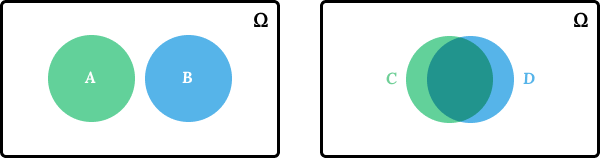

Events that don't intersect are called mutually exclusive — events A and B are mutually exclusive. If two events are mutually exclusive, it means they can't happen both at the same time — if one of the events happens, the other cannot possibly happen and vice-versa. Examples of mutually exclusive events include:

- Getting a 5 (event one) and getting a 3 (event two) when we roll a regular six-sided die — it's impossible to get both a 5 and 3.
- A coin lands on heads (event one) and tails (event two) — it's impossible for a coin to land on both heads and tails.

Events that intersect are called mutually non-exclusive — events C and D on the Venn diagram above are mutually non-exclusive. Mutually non-exclusive events can happen at the same time, and examples include:

- Getting a number greater than 2 (event one) and getting an odd number (event two) when we roll a regular six-sided die — we could get a 5, which is both greater than 2 (event one) and odd (event two).- 
A customer buys a red shirt (event one) and a blue shirt (event two) — the customer can buy both a red shirt (event one) and a blue shirt (event two).

For mutually non-exclusive events, we always need to use the formula below to make sure we don't include the area of intersection twice in our calculations (the area of intersection corresponds to the situation where both events happen):.

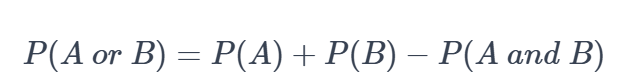

The formula above, however, works for both mutually non-exclusive and exclusive events. If two events — A and B — are mutually exclusive, then the event "A and B" is impossible (you can't get both heads and tails at the same time, for example). If event "A and B" is impossible, it means P(A and B) = 0, so:

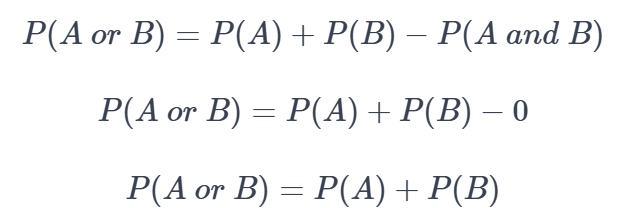

Let's now direct our attention to an exercise where we'll again consider the example with the betting company (please take a few seconds to recap the last exercise if you don't remember the example).

- Based on historical data, the company knows the empirical probabilities of the following events:
    - Event H (a new customer's first bet is on hockey) — the probability is 0.08.
    - Event C (a new customer's first bet is on car races) — the probability is 0.11.
    - Event "H or C" (a new customer's first bet is either on hockey or car races) — the probability is 0.17.
 
Find the probability that a new customer's first bet is on both hockey and car races. Assign your answer to p_h_and_c. Check the hint if you get stuck.

In [97]:
p_h_and_c = 0.08 + 0.11 - 0.17
p_h_and_c

0.01999999999999999

## Set Notation

Over the last two screens, we considered events like "A or B" and "A and B," and when we calculated probabilities, we wrote P(A or B) and P(A and B). Taken individually, event A and event B are sets containing a series of outcomes, and we need to introduce some notation around "or" and "and" when dealing with sets.

Consider the following sets:

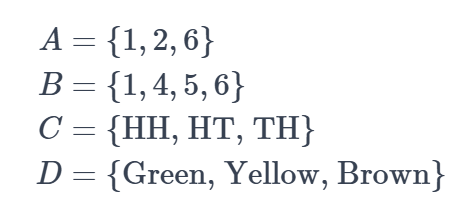

In set theory, when we say "set A or set B," we are referring to a single set that is the result of the union between set A and set B. The resulting set will have:

- The elements of set A that are not in B
- The elements of set B that are not in A
- The elements that occur in both A and B

A set can only contain unique elements, so the set resulting from a union cannot include the elements that occur in both A and B more than one time. Below, we see the result of a few unions between the four sets above (A, B, C, and D) — in set theory, we use the symbol 
∪
 to represent union:

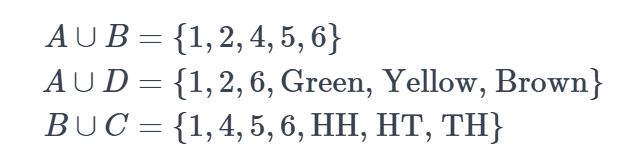

When we say "set A and set B," we are referring to a single set that contains all the unique elements that occur in both A and B. In set theory, this "and" operation is called intersection and is represented by the symbol 
∩
. Below, we see the results of the intersection of the various sets above (remember Ø means an empty set):

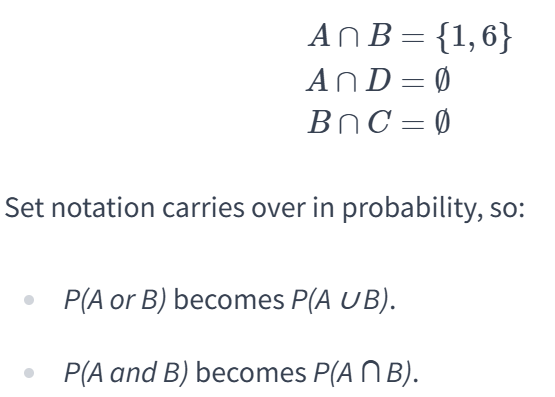

We can use set notation to rewrite the addition rule we already learned (this is the way you usually encounter the addition rule in many probability resources):

Moving forward, we're going to use set notation in our courses. Set notation is used pervasively in the probability literature — we chose to teach it so you don't feel lost when you consult other probability resources.

Now let's do a couple of exercises and wrap up this lesson in the next screen.

Consider the following sets:

- M = {100, 22, 1, 2}
- N = {22, car insurance, 2, house insurance}
- O = {HHHH, TTTT, TH}
- P = {Hockey, Cycling, Athletics, Swimming}

Consider the following set operations and their results:

- M ∪ P = Ø: If you think the result is correct, assign the boolean True to a variable named operation_1, otherwise assign False.
- N ∩ M = {22, 2}: If you think the result is correct, assign the boolean True to a variable named operation_2, otherwise assign False.
- O ∪ M = {HHHH, TTTT, 100, 22, 2}: If you think the result is correct, assign the boolean True to a variable named operation_3, otherwise assign False.
- P ∩ N = Ø: If you think the result is correct, assign the boolean True to a variable named operation_4, otherwise assign False.

In [98]:
operation_1 = False
operation_2 = True
operation_3 = False
operation_4 = True

In this lesson, we learned a few important things:

- The addition rule for mutually exclusive and non-exclusive events.
- How to represent events and sample space on Venn diagrams.
- How to use set notation in probability.

If you want to dig in more by yourself, we recommend checking the "Resources" section at the bottom of this lesson's takeaway.

In the next lesson, we'll build on the knowledge we've acquired and learn new techniques that will help us tackle questions we cannot yet answer:

1. What is the probability that it takes three flips or more for a coin to land heads up?
2. What is the probability of a coin landing heads up 18 times in a row?
3. What is the probability of getting at least one 6 in four throws of a single six-sided die?
4. What is the probability of getting at least one double-six in 24 throws of two six-sided dice?
5. What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?

## Probability Rules

This is a bonus lesson containing practice problems for the Probability Rules lesson, which is the second lesson of the Probability: Fundamentals course.

We're going to start with a few exercises about theory.

Evaluate the truth value of the following sentences.

- Two mutually exclusive events have no point of intersection on a Venn diagram. Assign the boolean True or False to sentence_1.
- The probability of an event must be greater than 0 and lower than 1. Assign the boolean True or False to sentence_2.
- Events A and B are mutually exclusive, so the probability that they happen both at the same time is 0. Assign the boolean True or False to sentence_3.

In [99]:
sentence_1 = True
sentence_2 = False
sentence_3 = True

## The Addition Rule

We started the practice on the previous screen with a few theoretical questions. On this screen, we're going to calculate probabilities using the addition rule.

The addition rule is one of the most important rules in probability because it enables us to answer many probability questions.

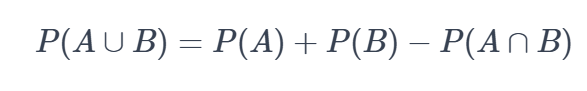

The equation we see above works for both mutually exclusive and non-exclusive events. For mutually exclusive events, however, we learned that the formula can be simplified to:

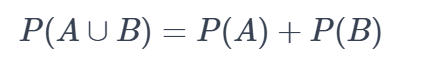

For mutually exclusive events, we can also extend the formula to more than just two events:

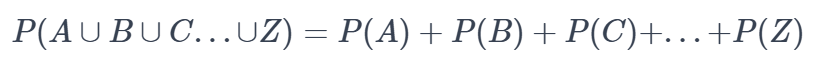

Over the course of the following screens, including this one, we'll practice solving probability problems using the addition rule.

A company that offers a task management software product analyzes customer behavior and finds that out of 100 randomly selected customers that sign up:

- 27 customers buy a basic monthly subscription
- 13 customers buy a premium monthly subscription
- 3 customers buy a gold monthly subscription

The company's subscription model offers only three options (basic, premium, and gold) and allows only one active subscription at a time per customer. Calculate the probability that a random customer who signed up:

1. Buys a premium or a basic subscription. Assign your answer to p_premium_or_basic.
2. Buys a subscription at all. Assign your answer to p_any_subscription.
3. Buys both a premium and a basic subscription. Assign your answer to p_premium_and_basic.
4. Doesn't buy any subscription at all. Assign your answer to p_no_subscription.
5. Buys a subscription or doesn't buy a subscription. Assign your answer to p_sub_or_no_sub.

premium_or_basic = 13/100 + 27 / 100 = 40 /100
p_any_subscription = 13 /100 + 27 / 100 + 3/100 = 43/100
p_premium_and_basic = 0
p_no_subscription = 57/100
p_sub_or_no_sub = 43/100 + 57/100 = 1

## Mutually Exclusive Events

On the previous screen, we solved a few exercises using the addition rule for mutually exclusive events.

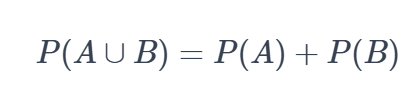

For mutually non-exclusive events, we always need to use the addition rule in the form we see below.

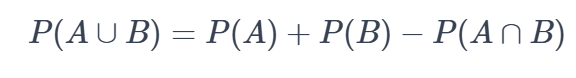

On this screen, we focus on calculating probabilities for mutually non-exclusive events.

A travel agency analyzed the purchasing behavior of its customers and found out that out of 132 randomly selected people:

- 64 bought a summer vacation
- 21 bought a winter vacation
- 15 bought both a summer and a winter vacation

The travel agency provides customers with only two options: a summer vacation and a winter vacation. Calculate:

1. The probability that a customer buys both a summer and a winter vacation. Assign your answer to p_summer_and_winter.
2. The probability that a customer buys a summer vacation or a winter vacation. Assign your answer to p_summer_or_winter.
3. The number of people who didn't buy a vacation at all. Assign your answer to n_no_vacation. Check the hint if you get stuck.
4. The probability that a person doesn't buy anything. Assign your answer to p_no_vacation.

In [103]:
p_summer_and_winter = 15 / 132
p_summer_or_winter = 70 / 132
n_no_vacation = 62
p_no_vacation = 62/132


## Modelling the Addition Rule

On the previous screen, we used the addition rule to solve a few probability problems.

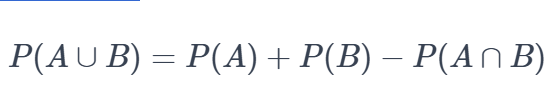

This rule can be modeled algebraically in several ways. For example, we can switch terms and come up with a formula for P(A):

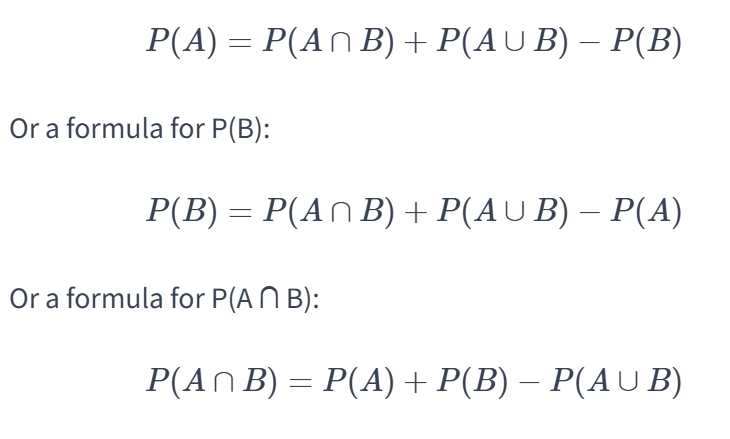

Let's now look at a few probability problems.

An advertising company experiments with new techniques and places two different ads side by side on the same web page and then measures the user interaction with those ads. Out of 974 users involved in the experiment:

- 152 users clicked on ad A
- 68 users clicked on ad B
- 211 users clicked on either ad A or ad B
Calculate:

1. The probability that a user clicks on both ads. Assign your answer to p_a_and_b.
2. The number of users who don't click any ad. Assign your answer to n_no_click.
3. The probability that a user doesn't click on either ad. Assign your answer to p_no_click.

In [104]:
p_a_and_b = 9 / 974
n_no_click = 763
p_no_click = n_no_click / 974

##  Sets

Over the last few screens, we focused on answering probability questions using the addition rule. We'll now turn our attention toward sets.

You might remember that the outcomes of a random experiment are usually represented as a set. For example, this is how we can represent the outcomes of a die roll as a set:

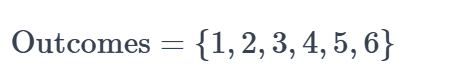

Set notation is pervasive in probability theory — for example, we write the addition rule using set operations like set union (
∪
) and set intersection (
∩
):

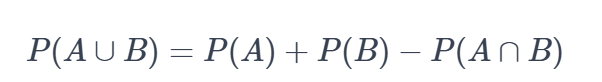

Let's now try to answer a few theoretical questions about sets.

Evaluate the truth value of the following sentences.

1. Sets can only contain real numbers. Assign the boolean True or False to sentence_1.
2. The intersection of two mutually exclusive events is an empty set. Assign the boolean True or False to sentence_2.
3. P(A 
∪
 B) represents the probability that both event A and B happen. Assign the boolean True or False to sentence_3.
4. If A 
∩
 B = Ø, then P(A 
∩
 B) = 0. Assign the boolean True or False to sentence_4.

In [105]:
sentence_1 =  False
sentence_2 = True
sentence_3 = False
sentence_4 = True

## Set Operations

On the last screen, we answered a few theoretical questions involving sets. We're now going to solve a few practical exercises.

Consider these three events associated with rolling a fair six-sided die:

- A: getting an odd number
- B: getting an even number
- C: getting a number greater than two

1. For each event, list the corresponding outcomes using a Python list. For instance, if you think the outcomes corresponding to event A are 1 and 2, then your answer should be the list [1, 2], where 1 and 2 are integers. Assign your answers to variables A, B, and C respectively.

2. Solve the following set intersections (for an empty set, assign an empty list):

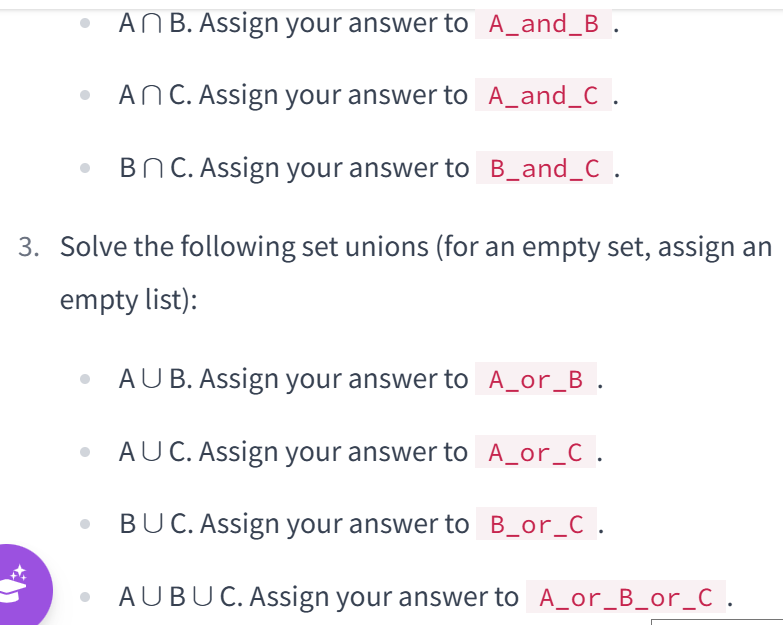

In [106]:
A = [1, 3, 5]
B = [2, 4, 6]
C = [3, 4, 5, 6]

A_and_B = []
A_and_C = [3, 5]
B_and_C = [4, 6]

A_or_B = [1, 2, 3, 4, 5, 6]
A_or_C = [1, 3, 4, 5, 6]
B_or_C = [2, 3, 4, 5, 6]
A_or_B_or_C = [1, 2, 3, 4, 5, 6]

## Calculating Probabilities

On the previous screen, we solved a few set operations. On this screen, we calculate probabilities for all ten events we considered.

All the events and their corresponding outcomes are already listed in the code editor.

Recall we initially considered three events associated with rolling a fair six-sided die:

- A: getting an odd number
- B: getting an even number
- C: getting a number greater than two

Calculate theoretical probabilities for all the ten events discussed in the previous screen. Assign your answers to:

In [107]:
A = [1, 3, 5]
B = [2, 4, 6]
C = [3, 4, 5, 6]

A_and_B = []
A_and_C = [3, 5]
B_and_C = [4, 6]

A_or_B = [1, 2, 3, 4, 5, 6]
A_or_C = [1, 3, 4, 5, 6]
B_or_C = [2, 3, 4, 5, 6]
A_or_B_or_C = [1, 2, 3, 4, 5, 6]

- p_A
- p_B
- p_C
- p_A_and_B
- p_A_and_C
- p_B_and_C
- p_A_or_B
- p_A_or_C
- p_B_or_C
- p_A_or_B_or_C

In [109]:
p_A = 3/6
p_B = 3/6
p_C = 4/6
p_A_and_B = 0
p_A_and_C = 2/6
p_B_and_C = 2/ 6
p_A_or_B = 1
p_A_or_C = 5/6
p_B_or_C = 5/6
p_A_or_B_or_C = 1

## Complex Probability Problems

With the concepts and techniques we've learned so far, we're now able to calculate empirical and theoretical probabilities for many kinds of events associated with any random experiment. There are, however, a few probability problems we cannot yet properly tackle using what we've learned:

1. What is the probability that it takes three flips or more for a coin to land heads up?
2. What is the probability of a coin landing heads up 18 times in a row?
3. What is the probability of getting at least one 6 in four throws of a single six-sided die?
4. What is the probability of getting at least one double-six in 24 throws of two six-sided dice?
5. What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?

In this lesson, we're going to develop new techniques that will help us answer all five questions — and many others.

For now, let's solve a few probability problems as a quick warm-up for the next screen. For the exercises below, you'll need to use the addition rule:

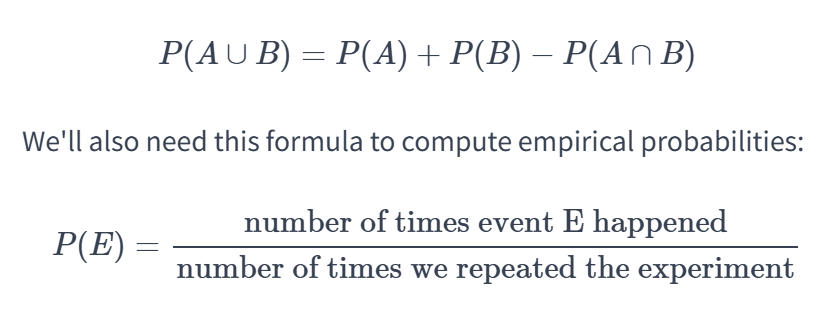

- An advertisement company runs a quick test and shows two ads on the same web page (ad "A" and ad "B") to 100 users. At the end of the trial, they found:

    - 12 users clicked on ad "A"
    - 17 users clicked on ad "B"
    - 3 users clicked on both ad "A" and ad "B"

- Find:

    1. The empirical probability that a user clicks on ad "A." Assign your result to p_a.
    2. The empirical probability that a user clicks on ad "B." Assign your result to p_b.
    3. The empirical probability that a user clicks on both ad "A" and ad "B." Assign your result to p_a_and_b.
    4. The probability that a user clicks on either ad "A" or ad "B." Assign your result to p_a_or_b. For this exercise, keep in mind a user can click on both ads, so the events are not mutually exclusive — use the addition rule.

In [110]:
p_a = 12 / 100
p_b = 17 / 100
p_a_and_b = 3 / 100
p_a_or_b = 26 / 100

In [111]:
p_a = 12 / 100

p_b = 17 / 100

p_a_and_b = 3 / 100

p_a_or_b = p_a + p_b - p_a_and_b
 

##  Opposite Events

In the previous lesson, we learned the probability of any event ranges between 0 and 1:

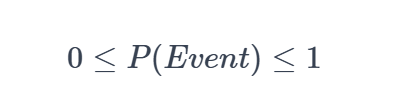

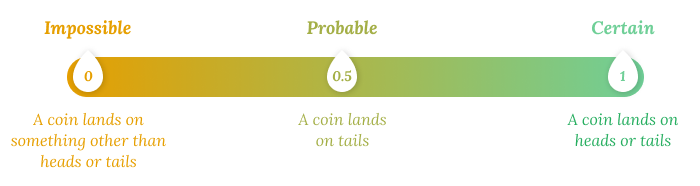

We also saw the probability of an event that contains all the outcomes of the sample space is 1 (recall from the previous lesson that a sample space is the set of all possible outcomes of a random experiment; the sample space is denoted by the Greek letter Ω — read "omega"):

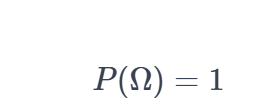

For instance, getting a number less than 7 when rolling a six-sided die (we'll call this event "A") corresponds to all the outcomes in the sample space, so:

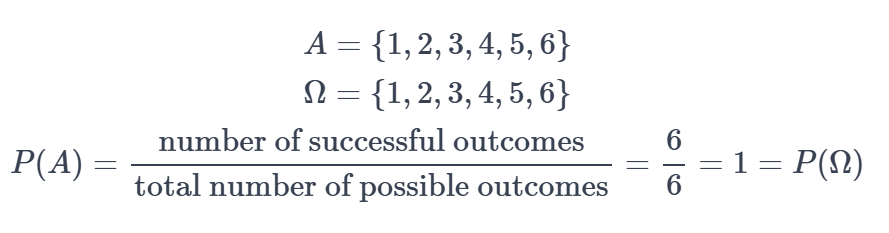

Now consider the two events below, which we're going to call "B" and "non-B":

- Getting a 2 when rolling a fair six-sided die (event B)
- Not getting a 2 when rolling a fair six-sided die (event non-B)

Events B and non-B correspond to the following outcomes:

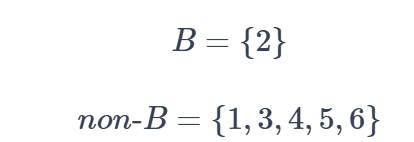

When we throw the die, it's certain we'll get either a 2 (B) or other number (non-B). This means the event "B or non-B" (B ∪ non-B) is certain, and it has a probability of 1.

Below, we'll use the addition rule to calculate P(B ∪ non-B). Before we do that, recall that in set notation we write "B or non-B" as B ∪ non-B. Note that B and non-B are also mutually exclusive events, which means they can't happen simultaneously — we can't get both a 2 and another number when we roll the die.

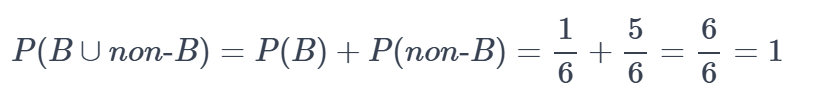

More generally, for any random experiment either event "E" or "non-E" will happen, so the event "E or non-E" is certain and has a probability of 1:

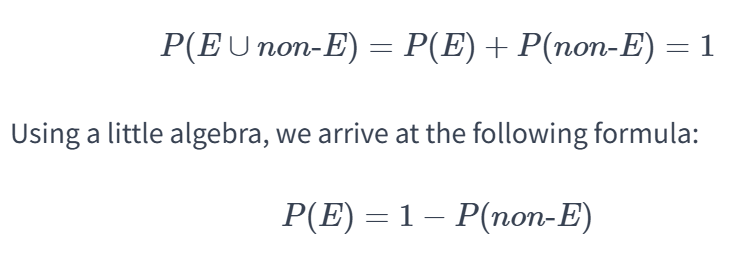

On the next screen, we'll explain in detail how the formula above helps us answer the first of the five questions we posed in the introduction: what is the probability that it takes three flips or more for a coin to land heads up? We'll now stop for a few exercises.

- A company that develops a time-tracking tool sells two kinds of subscription: basic and premium. When a new user tries the product, there's a 0.2 probability the user buys the basic subscription and 0.15 he buys premium. Find:
    1. The probability that a new user doesn't buy a basic subscription (you'll need to use the P(E) = 1 - P(non-E) formula). Assign your result to p_non_basic.
    2. The probability that a new user doesn't buy a premium subscription. Assign your result to p_non_premium.
    3. The probability that a user buys either basic or premium. Assign your result to p_subscription (assume buying basic and buying premium are mutually exclusive).
    4. The probability that a new user doesn't buy a subscription. Assign your result to p_non_subscription.

In [117]:
p_non_basic = 1 - 0.2 # = 0.8
p_non_premium = 1 - 0.15 # = 0.85
p_subscription =  0.2 + 0.15 # = 0.35
p_non_subscription = 1 - 0.35 # = 0.65

## Example Walk-Through

We'll now build on what we learned in the previous screen and find the probability that it takes three flips or more for a coin to land heads up — we're going to call this event "A."

Event A (it takes three flips or more for a coin to land heads up) corresponds to the following outcomes, where each number represents the number of flips it takes until we first get heads up (number three, for example, says "the coin first landed heads up on the third flip"):

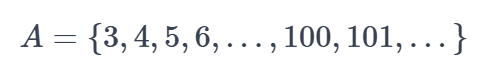

Notice event A contains an infinite number of outcomes. When we flip the coin, we could get heads up on the first flip, or the second, or the third, the fourth, the fifth and so forth — in principle, we could never get heads up.

The opposite of event A (it takes less than three flips for the coin to land heads up), which we'll call "non-A," has only two outcomes:

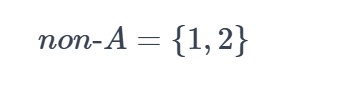

In this random experiment, either A or non-A will happen, so:

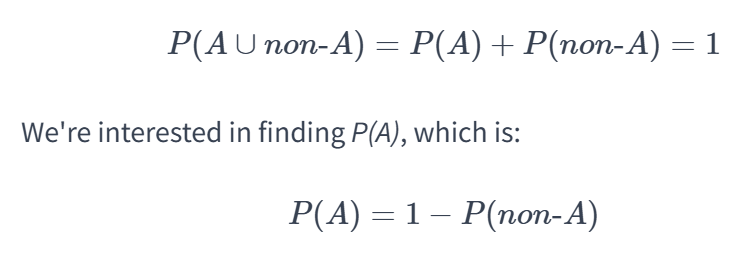

We can find P(A) indirectly by first finding P(non-A), and then substituting in the equation above.

Recall event A happens if it takes three flips or more for a coin to land heads up. If we flip a coin twice and it lands heads up at least once, it means event non-A happens.

This means finding P(non-A) is equivalent to finding the probability that a coin flipped twice lands heads up at least once. If we flip a coin twice, these are all the outcomes we can get: {HH, HT, TH, TT}, where "H" stands for heads, "T" for tails, and "HT" means "heads on the first flip, and tails on the second one."

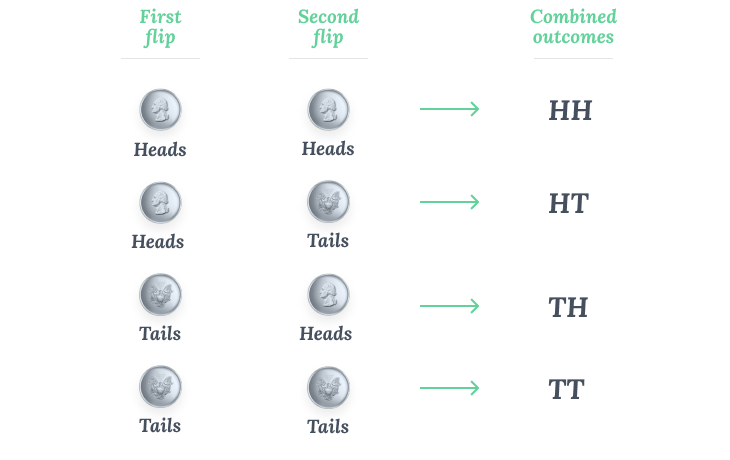

Only the outcomes {HH, HT, TH} are successful with respect to the event non-A (the coin lands heads up at least once in two flips). There are four possible outcomes, which means:

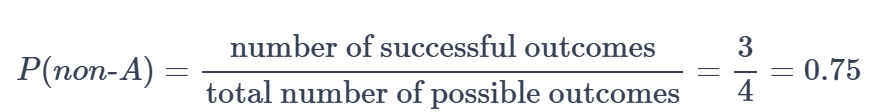

Now that we know P(non-A), we can find P(A), the probability that it takes three flips or more for a coin to land heads up:

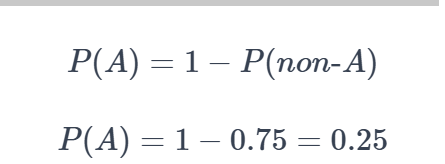

Let's now do a similar exercise to solidify our knowledge.

1. Find the probability that it takes four flips or more for a coin to land heads up (let's call this event "B").
    - Begin with finding the probability of the event non-B, which is equivalent to finding the probability that we'll get at least one heads if we flip a coin three times. Assign your result to p_non_b.
    - Now use p_non_b to find the probability of B. Assign your result to p_b.
    - Check the hint if you have difficulties solving this exercise.

In [122]:
p_non_b = 7/8
p_b = 1 - p_non_b
p_b

0.125

## Set Complements

On this screen, we introduce some set notation — otherwise things may get confusing when you read other resources on probability. In the previous two screens, we saw:

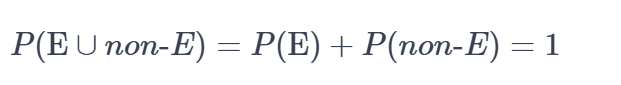

Consider the event "getting a 2 when rolling a fair six-sided die," which we'll call "B." Event B corresponds to the set B = {2}, and it can be represented on a Venn diagram like this:

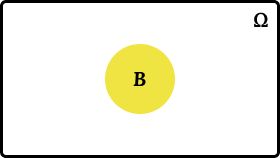

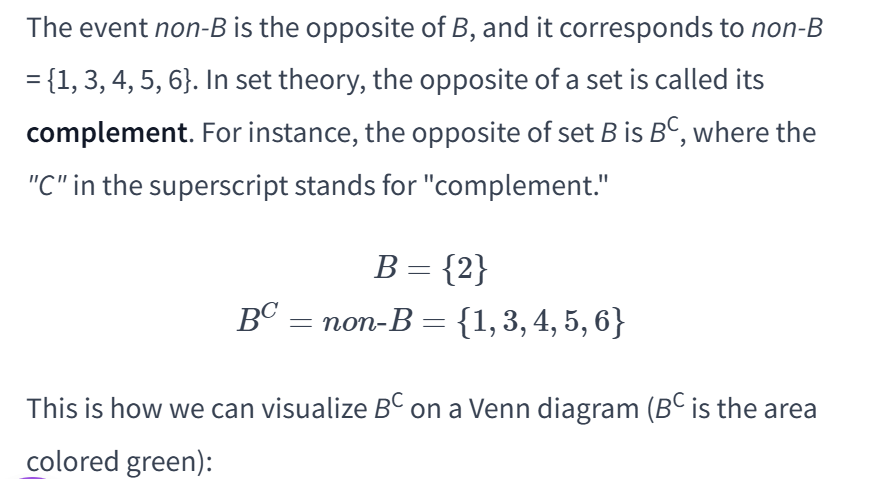

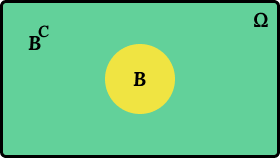

We can now rewrite the first equation of this screen using set notation:

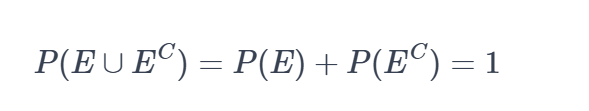

While this is mere notation, this is what you'll encounter in most probability resources — learning it will help you navigate other resources much easier. We'll now do a quick exercise and then tackle our next question: what is the probability of a coin landing heads up 18 times in a row?

- An advertisement company monitors the activity for a specific ad and shows it repeatedly to the same users (so a single user sees the ad multiple times). Regardless of the number of times the ad is shown to a user, the probability that the user clicks on the ad is 0.5. Find:
    1. The probability that a user doesn't click on the ad. Assign your answer to p_non_click.
    2. The probability that it takes two times or less for a user to click on the ad. Assign your answer to p_two_or_less.
    3. The probability that it takes three times or more for a user to click on the ad. Assign your answer to p_three_or_more.

In [124]:
p_non_click = 1 - 0.5 # = 0.5
p_two_or_less = 3/4
p_three_or_more  = 1 - p_two_or_less

In [125]:
p_non_click = 1 - 0.5
p_two_or_less = 3/4
p_three_or_more = 1 - 3/4

## The Multiplication Rule

Over the next two screens, we're going to learn a new technique that will allow us to find the probability of a coin landing heads up 18 times in a row. We begin by finding the probability of a coin landing heads up two times in a row.

If we flip a coin twice, these are all the outcomes we can get ("H" stands for heads, "T" for tails, and "HT" means "heads on the first flip, and tails on the second flip"):

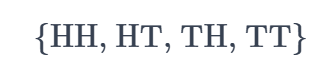

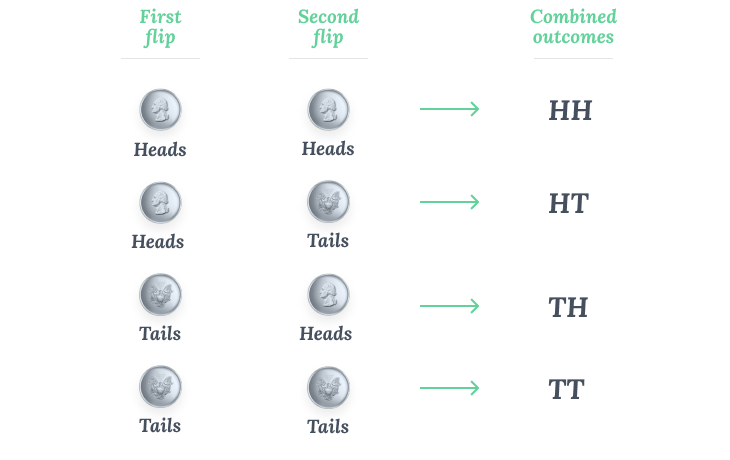

From all the possible outcomes, only one outcome (HH) is successful with respect to the event where the coin lands heads up two times in a row. We abbreviate this event "HH", so:

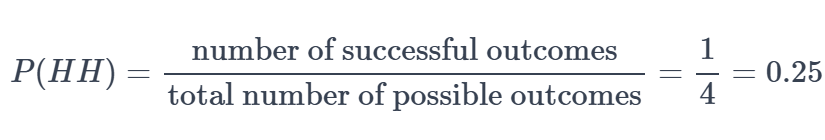

This approach works fine when we're dealing with only two flips, but things become more complicated for 18 flips. For two flips, we have four possible outcomes (HH, HT, TH, and TT), but for 18 flips we have 262,144 possible outcomes (we'll learn how to calculate this ourselves in the next lesson). Consequently, we'll now look at a different approach of finding P(HH).

Finding P(HH) means finding the probability that the coin lands heads up on the first flip (we'll call this event H1), and the coin lands heads up on the second flip (we'll call this event H2). So we want to find P(H1 and H2), or, using set notation, P(H1 ∩ H2).

To find P(H1 ∩ H2), we can use a new rule called the multiplication rule of probability and multiply P(H1) by P(H2):

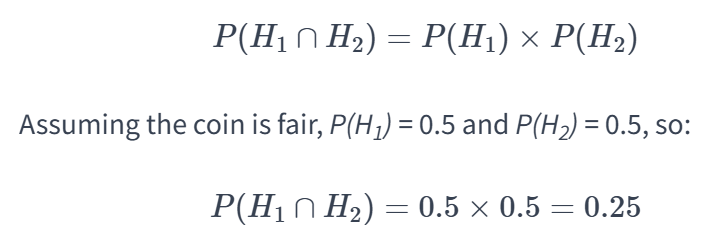

This is the same result we got from our previous approach. In more general terms, the multiplication rule says that for two events E1 and E2, the probability that both event E1 and E2 happen can be found by multiplying the probability of E1 by the probability of E2:

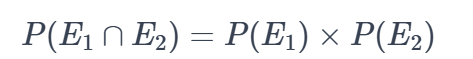

We'll continue the discussion in the next screen, where we'll also see the multiplication rule is a bit more nuanced. We'll also use the multiplication rule to find the probability of a coin landing heads up 18 times in a row.

- For rolling a fair six-sided die, find:
    1. The probability of getting a 6 two times in a row. Assign your result to p_6_6.
    2. The probability of getting a 3 on the first throw and a 2 on the second throw. Assign your result to p_3_2.
    3. The probability of getting an even number on both throws. Assign your result to p_even_even.
    4. The probability of getting a 1 on the first throw and an even number on the second throw. Assign your result to p_1_even.



In [126]:
p_6_6 = 1/36
p_3_2 = 1/36
p_even_even = 9/36 # = 1/4
p_1_even = 3/36 # = 1/12

## Independent Events

On the previous screen, we learned to use the multiplication rule to find P(E1 ∩ E2):

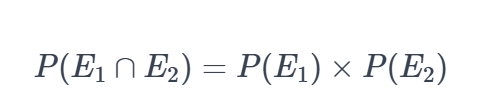

The multiplication rule, however, is a bit more nuanced, and it doesn't work for all kinds of events — at least not in this form. Consider the following two events, which are associated with flipping a fair coin:

- H1: the coin lands heads up on the first flip
- H2: the coin lands heads up on the second flip

Taken individually, P(H1) = 0.5 and P(H2) = 0.5. If event H1 happens (the coin lands heads up), P(H2) keeps the same value (0.5) — the fact the we get heads up on the first flip doesn't influence in any way the probability of getting heads up on the second flip.

Events that don't influence each other's probability are called independent events. If H1 happens, P(H2) stays the same, so H1 and H2 are independent. The multiplication rule we learned only works for independent events.

Consider now the following two events, which are associated with rolling a fair six-sided die:
- A: we get a number less than 4; event A corresponds to the outcomes {1, 2, 3}
- B: we get an even number; event B corresponds to the outcomes {2, 4, 6}


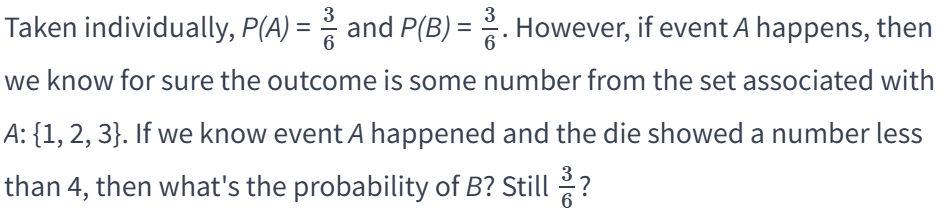

Event B (getting an even number) corresponds to the outcomes {2, 4, 6}. We know for sure we got one of the numbers {1, 2, 3} — because we know event A happened. Only 2 is an even number in {1, 2, 3}, so event B can only happen in this case if the die showed a 2 — because event B only happens if the die shows an even number ({2, 4, 6}). There are three possible outcomes ({1, 2, 3}) and only one successful outcome ({2}), so P(B) becomes:

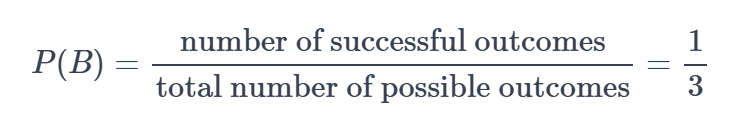

We can conclude that if event A happens, the probability of event B changes. If event B happened, this will also change the probability of A. Events A and B influence each other's probability, so they are not independent.

The multiplication rule we learned doesn't work for events that are not independent. In a future course, we'll learn conditional probability and introduce a revised multiplication rule which also work for non-independent events. We'll also get a chance to derive the multiplication rule and understand why it works.

So far, we've used the multiplication rule to calculate the probability of two independent events. The rule, however, works for any number of events — what we need to do is multiply together the probability of all the events:

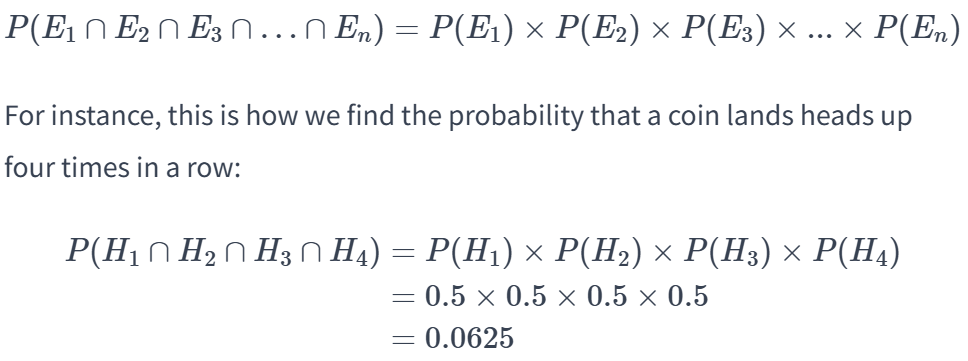

Let's now answer our initial question and a few others that can be solved in the same way.

- Find the probability of:
    1. Getting heads up 18 times in a row when flipping a fair coin. Assign your answer to p_18h.
    2. Getting a six three times in a row when throwing a fair six-sided die. Assign your answer to p_666.
    3. Not getting any six when throwing a fair six-sided die four times. Assign your answer to p_not_6.

In [127]:
p_18h = (1/2) ** 18
p_666 = (1/6) ** 3
p_not_6 = 1- (1/6) ** 4

## Combining Formulas

Previously in this lesson, we learned that:

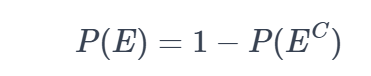

We also learned to use the multiplication rule for any number of independent events:

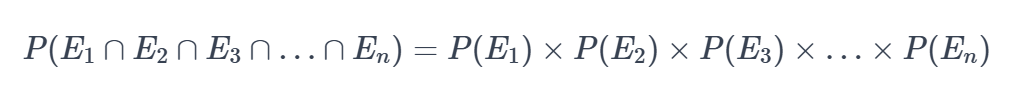

We can combine these two rules to solve two of the probability problems we posed in the beginning:

- What is the probability of getting at least one 6 in four throws of a single six-sided die?
- What is the probability of getting at least one double-six in 24 throws of two six-sided dice (the two dice are thrown simultaneously)?


Let's begin with the first question and use "A" to refer to the event "getting at least one 6 in four throws of a single six-sided die". To find P(A), we can use the formula:

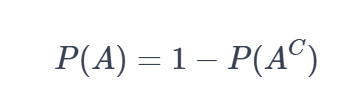

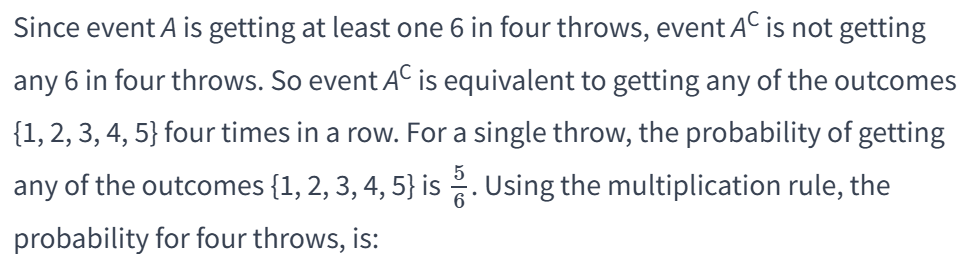

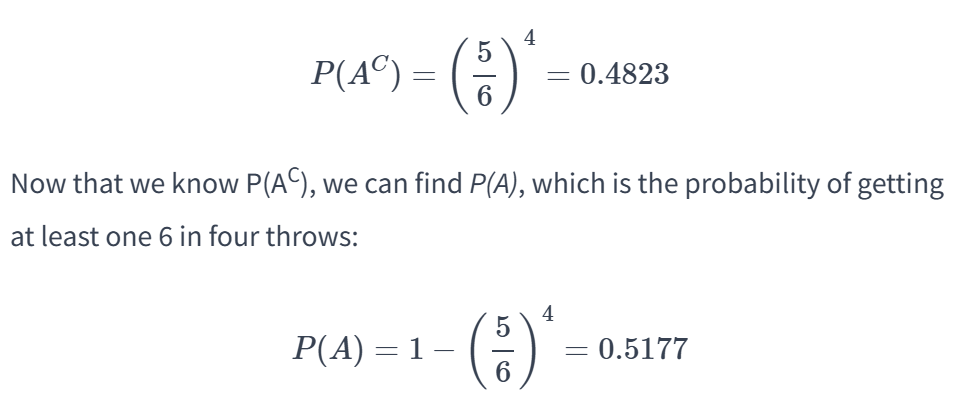

The second question is left as an exercise (you can find the answer using an identical approach as we took above for the first question). On the next screen, we're going to answer our last question and find the probability of getting four aces in a row when drawing cards from a standard 52-card deck — we'll see this problem is a bit tricky.

1. Find the probability of getting at least one double-six in 24 throws of two six-sided dice (the two dice are thrown simultaneously). Assign your answer to p_one_double_6. The table below shows all the outcomes of throwing two six-sided dice.

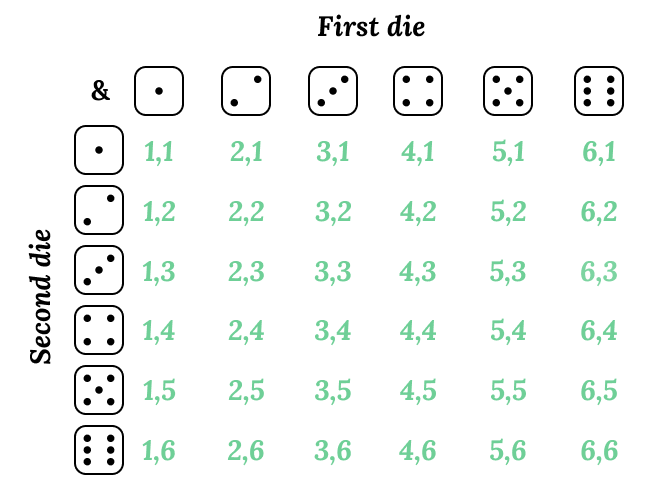

In [130]:
p_one_double_6 = 1 - (35/36) ** 24
p_one_double_6

0.4914038761309034

## Sampling With(out) Replacement

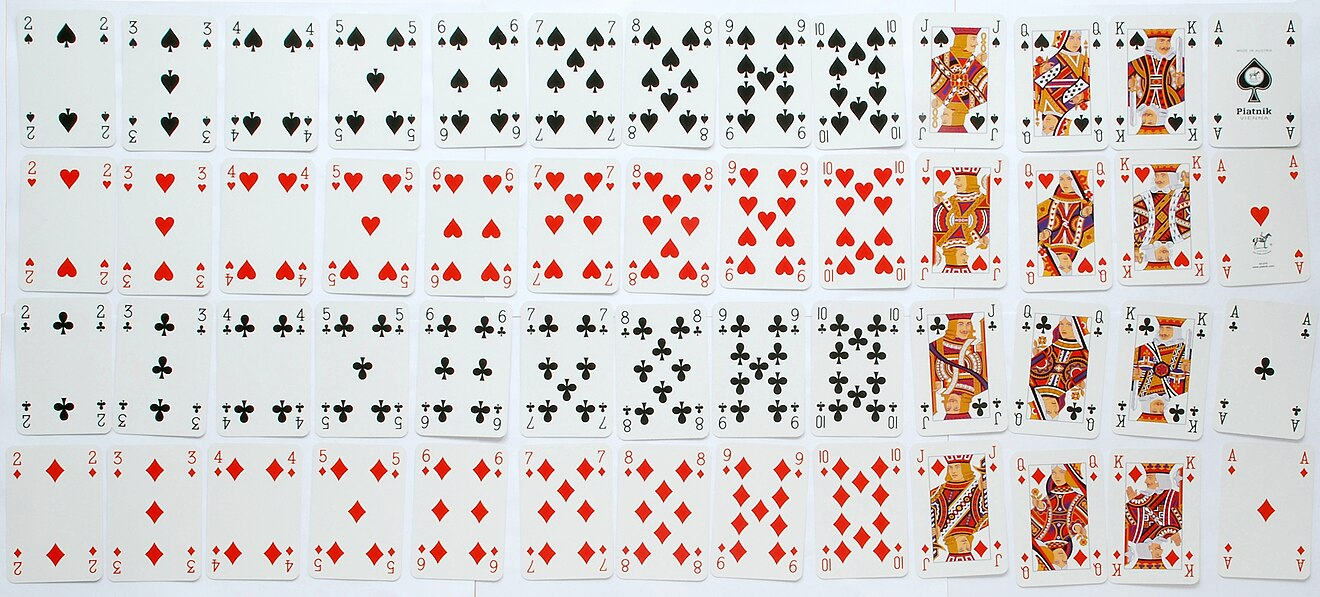

On this screen, we're going to find the probability of getting four aces in a row when drawing cards from a [standard 52-card deck](https://en.wikipedia.org/wiki/Standard_52-card_deck). The deck has four aces and a total of 52 cards.

A standard 52-card French-suited deck comprises 13 ranks in each of the four suits: clubs (♣), diamonds (♦), hearts (♥) and spades (♠). Each suit includes three court cards (face cards), King, Queen and Jack, with reversible (i.e. double headed) images. Each suit also includes ten numeral cards or pip cards, from one (Ace) to ten. The card with one pip is known as an Ace. Each pip card displays the number of pips (symbols of the suit) corresponding to its number, as well as the appropriate numeral (except "A" for the Ace) in at least two corners.

Find the probability of getting four aces in a row when drawing cards from a standard 52-card deck 

Since there are four aces and 52 cards, the probability of drawing an ace if we draw a card is:

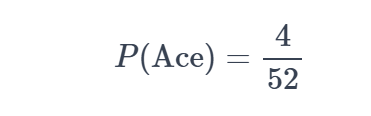

You might think that in order to find the probability of drawing four aces in a row (we'll call this event "AAAA"), all we need to do is multiply P(Ace) by itself four times:

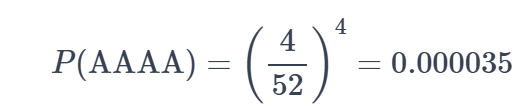

However, whether multiplying P(Ace) by itself four times is correct or not depends on an important detail: whether we put the cards we draw back in the deck. Let's first consider the case where we draw cards from the deck, but we don't put them back.

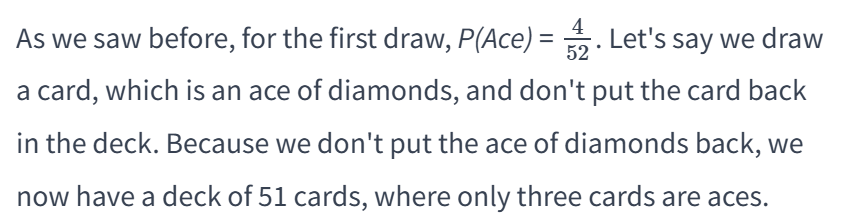

With 51 cards and three aces, the probability of getting an ace for the second draw is:

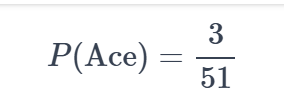

To find the probability of getting four aces in a row, we need to take into account at each step that the card is not put back in the deck:

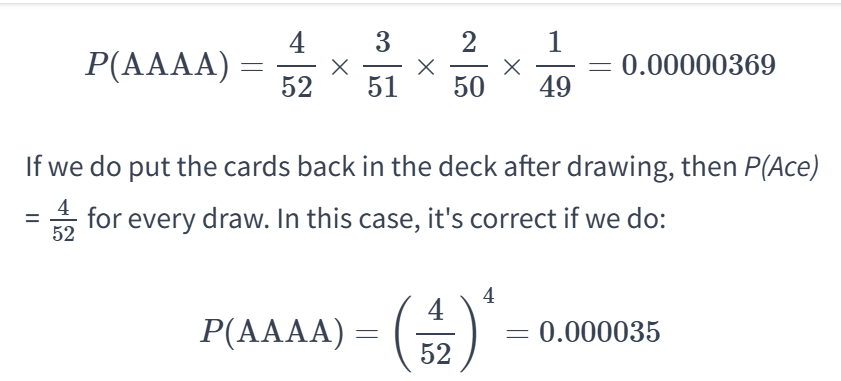

When we replace the cards after drawing, we say that we're sampling with replacement. When we don't put the cards back, we're sampling without replacement. In either case, the chances of getting four aces in a row are extremely low, so remember: never bet on getting four aces in a row.

Let's now look at a similar exercise and wrap up this lesson on the next screen.

- We're sampling without replacement from a standard 52-card deck. Find the probability of:
    1. Getting two kings in a row. Assign your answer to p_kk.
    2. Getting a seven of hearts, followed by a queen of diamonds. Assign your answer to p_7q.
    3. Getting a jack, followed by a queen of diamonds, followed by a king, followed by another jack. Assign your answer to p_jqkj. This one is a bit tricky, so pay attention to the details of the question.


In [131]:
p_kk = 4/52 * 3 / 51
p_7q = 1/ 52 * 1/ 51
p_jqk = 4/52 * 1/51 * 4 / 50 * 3 /49

## Next Steps

In this lesson, we learned new techniques and managed to answer the five questions we posed in the intro:

1. What is the probability that it takes three flips or more for a coin to land heads up?
2. What is the probability of a coin landing heads up 18 times in a row?
3. What is the probability of getting at least one 6 in four throws of a single six-sided die?
4. What is the probability of getting at least one double-six in 24 throws of two six-sided dice?
5. What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?

In the next lesson, we'll solve even more complex probability problems using special counting techniques like permutations and combinations.

##  Theoretical Problems

Evaluate the truth value of the following sentences.

1. In a finished random experiment, event A didn't happen, so AC must have happened. Assign the boolean True or False to sentence_1.
2. Event H1 (a fair coin lands heads up on the first flip) is independent of event H1000 (a fair coin lands heads up on the 1000th flip), and P(H1000) = 0.5 as a consequence. Assign the boolean True or False to sentence_2.
3. A school library has 5,218 books in its stock — if we're sampling with replacement three times, there'll be 5,215 books left when we sample for the fourth time. Assign the boolean True or False to sentence_3.
4. If two events A and B are independent, they must also be mutually exclusive as a consequence. Assign the boolean True or False to sentence_4.

In [132]:
sentence_1 = True
sentence_2 = True
sentence_3 = False
sentence_4 = False

## Mixed Probability Problems 1

On the previous screen, we answered a few theoretical questions. We're now going to focus on solving probability problems.

Recall that in our last lesson we learned how to answer these five probability questions:

1. What is the probability that it takes three flips or more for a coin to land heads up?
2. What is the probability of a coin landing heads up 18 times in a row?
3. What is the probability of getting at least one 6 in four throws of a single six-sided die?
4. What is the probability of getting at least one double-six in 24 throws of two six-sided dice?
5. What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?

In this lesson, we're going to practice solving similar problems. Let's get started!

A library has a stock of 2,701 books. If we sample randomly and with replacement a book from the library, the probability of taking a history book is 0.07 every time we perform the random experiment. Calculate:

1. The probability of not getting a history book if we sample once. Assign your answer to p_history_c.
2. The probability of taking a history book on the fifth time we perform the experiment. Assign your answer to p_history_5th.
3. The probability of taking a history book 16 times in a row. Assign your answer to p_history_16.
4. The probability of taking a non-history book seven times in a row. Assign your answer to p_nonhistory_7.

In [134]:
p_history_c = 1 - 0.07
p_history_5th = 0.07
p_history_16 = 0.07 ** 16 
p_nonhistory_7 = p_history_c ** 7

## Mixed Probability Problems 2

For our previous exercise, we used an example with a library which has a stock of 2,701 books. We'll continue using this example for our next exercise.

A library has a stock of 2,701 books. If we sample randomly and with replacement a book from the library, the probability of taking a history book is 0.07 every time we perform the random experiment. Calculate:

1. The probability that we don't take any history book in the first three draws. Assign your answer to p_nonhistory_3.
2. The probability that it takes four draws or more to get a history book from the library. Assign your answer to p_history_4_or_more.

In [135]:
p_nonhistory_3 = (1 -  0.07) ** 3
p_history_4_or_more = 1 - p_nonhistory_3

## Mixed Probability Problems 3

For our previous two exercises, we used an example with a library which has a stock of 2,701 books. We'll continue using this example for the next exercise.

A library has a stock of 2,701 books. If we sample randomly and with replacement a book from the library, the probability of taking a history book is 0.07 every time we perform the random experiment. Calculate:

1. The probability that we take at least one history book in eight draws. Assign your answer to p_history_in_8.
2. The probability that we take at least one history book in 21 draws. Assign your answer to p_history_in_21.

In [136]:
p_history_in_8 = 1 - (1 - 0.07) ** 8
p_history_in_21 = - (1 - 0.07) ** 21

The Addition Rule Again

On the previous screens, we managed to answer probability questions using these two rules:

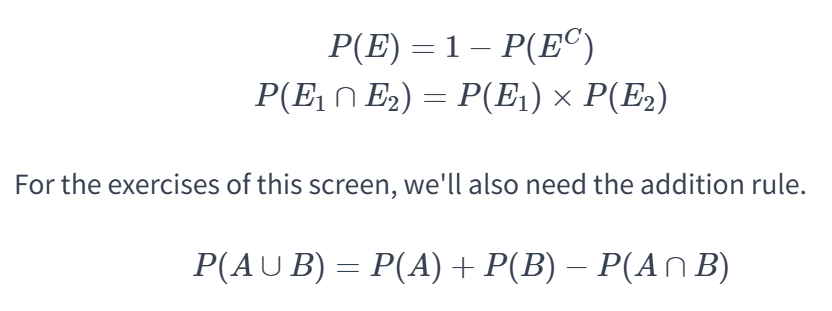

An online store that sells console games runs a sale for two games: FIFA 20 and Mortal Kombat 11. After a few days running the sale, the data team determines the following empirical probabilities:

- The probability that a customer buys FIFA 20 is 0.13.- 
The probability that a customer doesn't buy Mortal Kombat 11 is 0.91.

Calculate:

1. The probability that a customer buys both games (assume that buying FIFA 20 and buying Mortal Kombat 11 are independent events). Assign your answer to p_fifa_and_mk.
2. The probability that a customer buys either FIFA 20 or Mortal Kombat 11. Assign your answer to p_fifa_or_mk.
3. The probability that a customer doesn't buy anything. Assign your answer to p_no_game.

In [138]:
(1 - 0.91)

0.08999999999999997

In [139]:
p_fifa_and_mk = 0.13 * (1 - 0.91)
p_fifa_or_mk =  0.13 + (1 - 0.91) - (p_fifa_and_mk)
p_no_game = (1 - 0.13) * 0.91

In [140]:
p_fifa_and_mk

0.011699999999999997

In [141]:
p_fifa_or_mk 

0.20829999999999999

In [142]:
p_no_game

0.7917000000000001

## Sampling With(out) Replacement

On the previous screen, we managed to answer a few probability questions using three probability rules:

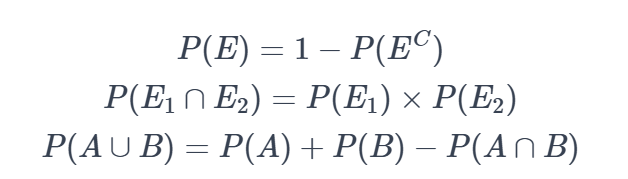

On this screen, we focus on solving probability problems in the context of sampling with and without replacement.

We're sampling without replacement from a standard 52-card deck. Calculate the probability that we get:

1. Three queens in a row. Assign your answer to p_qqq.
2. A seven of clubs, followed by two queens, followed by an ace of diamonds. Assign your answer to p_7qqa.
3. Ten clubs in a row. Assign your answer to p_10_clubs. You should use a for loop.

We're sampling with replacement from a standard 52-card deck. Calculate the probability that we get:

1. Two aces in a row. Assign your answer to p_aa.
2. An ace or a queen on the first draw, followed by a seven of hearts. p_a_or_q_and_7.
3. 20 spades in a row. Assign your answer to p_20_spades.

In [144]:
p_qqq = 4/ 52 * 3 /51 * 2 /50
p_7qqa = 1 / 52 * 4 /51 * 3 /50 * 1 / 49
p_10_clubs = 1

for i in range(11):
    p_10_clubs  *= (13 - i) / (52 -i)



p_aa = 4/52 * 4/52
p_a_or_q_and_7 = 8/52 * 1/52
p_20_spades = (13 / 52) ** 20

In [145]:
p_qqq = 4/52 * 3/51 * 2/50

p_7qqa = 1/52 * 4 / 51 * 3 / 50 * 1/ 49

p_10_clubs = 1

for i in range(10):
    p_10_clubs = p_10_clubs * (13 - i) / (52 - i)
    
p_aa = 4 / 52 * 4/52

p_a_or_q_and_7 = (4/ 52 + 4 / 52) * 1/52

p_20_spades = (13 / 52) ** 20

## The Rule of Product

So far in our course, we learned to calculate probabilities for all sorts of events. In this lesson, we'll direct our focus not so much toward calculating probabilities, but toward calculating the number of outcomes associated with various random experiments. We'll learn some powerful counting techniques that will allow us to answer questions like:

1. What is the probability of cracking a 4-digit PIN code using the code 8362?
2. What is the probability of cracking a 6-digit PIN code using the code 348821?
3. What is the probability of winning the big prize in a state lottery if we use the numbers (3, 20, 37, 44, 45, 49)?

We begin with considering a composite experiment A1A2 made of two different experiments, which we denote by "A1" and "A2":

- A1: flipping a coin- 
A2: throwing a six-sided die

A1A2 means we flip a coin and throw a die and consider the outcomes of the two individual experiments together (the two individual experiments are flipping a coin and throwing a die). One of the possible outcomes of the composite experiment A1A2 is (H, 1), which means the coin lands heads up and the die shows a 1. There are 12 possible outcomes associated with A1A2:

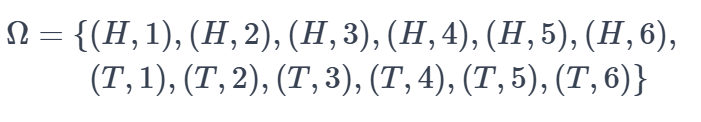

We can also illustrate the outcomes using a tree diagram:

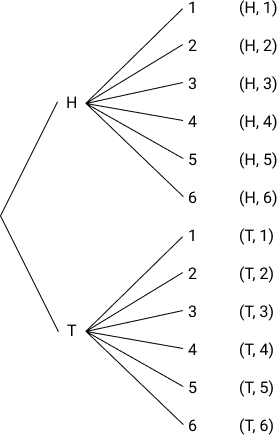

When we flip the coin, there are two possible outcomes: heads or tails. Each of the two outcomes can be followed by six other outcomes, depending how the six-sided die lands. If there are two outcomes, and each of these two have six other corresponding outcomes, we can use multiplication to find the total number of outcomes:

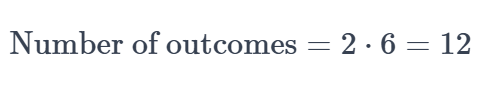

Generally, if we have an experiment E1 (like flipping a coin) with a outcomes, followed by an experiment E2 (like rolling a die) with b outcomes, then the total number of outcomes for the composite experiment E1E2 can be found by multiplying a with b:

The formula above is known as the rule of product (or the multiplication principle). Note that this is different than the multiplication rule we learned in the previous lesson.

We'll use the rule of product throughout this lesson to build more powerful counting techniques. For now, let's do a quick exercise.

Consider the composite experiment E1E2, where E1 is rolling a fair six-sided die once, and E2 is rolling the same die again. One of the outcomes of E1E2 could be (1, 6), which means we get a 1 for the first roll and a 6 for the second one.

1. Use the rule of product to calculate the total number of outcomes. Assign your answer to n_outcomes.

2. Use n_outcomes to calculate the probability of getting a (6,6). Assign your answer to p_six_six. Check the hint if you have difficulties calculating this.

3. Use n_outcomes to calculate the probability of not getting a (5,5) and assign your answer to p_not_five_five.

In [147]:
n_outcomes = 6 * 6 # = 36
p_six_six =  1/36
p_six_six = 35/36

## Extended Rule of Product

On the previous screen, we learned that if we have an experiment E1 (like flipping a coin) with a outcomes, followed by an experiment E2 (like rolling a die) with b outcomes, then the total number of outcomes for the composite experiment E1E2 can be found by multiplying a with b (recall this is called the rule of product):

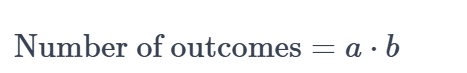

We can extend the rule of product for any number of experiments. For instance, consider the composite experiment E1E2E3, where:

- E1 is flipping a coin
- E2 is rolling a six-sided die
- E3 is flipping a coin (again, yes)

We can use a tree diagram to visualize the outcomes — we see there are 24 outcomes:

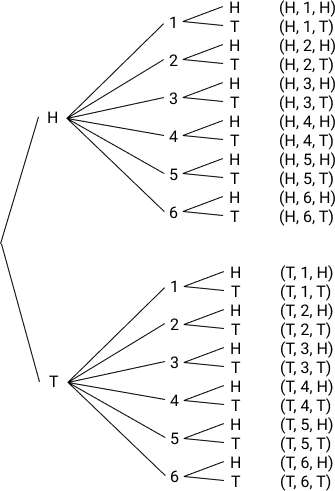

We can extend the rule of product and multiply the outcomes of each experiment to get 24 outcomes:

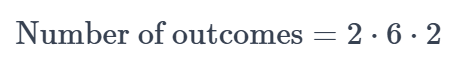

More generally, if we have an experiment E1 with a outcomes, followed by an experiment E2 with b outcomes, followed by an experiment En with z outcomes, the total number of outcomes for the composite experiment E1E2 ... En can be found by multiplying their individual outcomes:

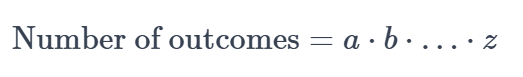

Let's now use this extended rule of product to calculate more outcomes and probabilities.

We roll a fair six-sided die three times and then randomly draw a card from a standard 52-card deck. One of the outcomes is (6, 6, 6, ace of diamonds), which means getting three 6's in a row when we roll the die, followed by drawing an ace of diamonds from the deck.

1. Use the extended rule of product to calculate the total number of outcomes. Assign your answer to total_outcomes.

2. Use total_outcomes to calculate the probability of getting (6, 6, 6, ace of diamonds) — three sixes in a row followed by an ace of diamonds. Assign your answer to p_666_ace_diamonds.

3. Use p_666_ace_diamonds to calculate the probability of getting anything but (6, 6, 6, ace of diamonds). Assign your answer to p_no_666_ace_diamonds.

In [149]:
total_outcomes = 6 * 6 * 6 * 52

p_666_ace_diamonds =  1 / total_outcomes

p_no_666_ace_diamonds = 1 - p_666_ace_diamonds

## Example Walkthrough

On the previous screen, we learned to compute the number of outcomes for any composite experiment E1E2 ... En using the formula below (where a, b, and z represent the number of outcomes associated with the individual experiments that are part of the composite experiment E1E2 ... En):

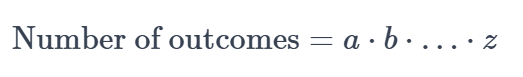

Let's say we're interested in finding the probability of cracking a 4-digit PIN code using the code 8362 (we chose 8362 randomly). To calculate the probability, we can use the formula:

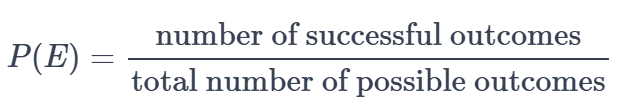

The code 8362 is the only successful outcome, so the formula above becomes:

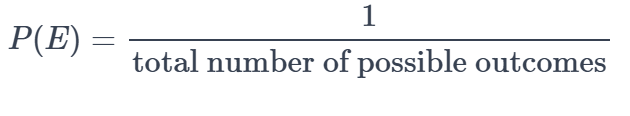

To find the total number of possible outcomes, we need to find the total number of possible 4-digit PIN codes. One way to form a 4-digit code is to sample with replacement four times from the set {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} — recall sampling with replacement means randomly extracting an element from a group, and then putting the element back in the group. The process of forming a 4-digit code can be broken down to four experiments:

- E1, which has 10 possible outcomes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
- E2, which has 10 possible outcomes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
- E3, which has 10 possible outcomes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
- E4, which has 10 possible outcomes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

A 4-digit code can be thought of as the result of the composite experiment E1E2E3E4. For instance, the code 5391 means the experiment:

- E1 ended in a 5.
- E2 ended in a 3.
- E3 ended in a 9.
- E4 ended in a 1.

Finding the total number of possible 4-digit codes is equivalent to finding the total number of outcomes for the composite experiment E1E2E3E4, for which we can use the extended rule of product:

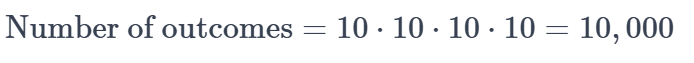

We conclude we have 10,000 possible 4-digit PIN codes. This makes some intuitive sense, since 4-digit PIN codes vary between 0000 and 9999 (this is like counting from 0 to 9999: 0000, 0001, 0002, ..., 9998, 9999).

In the following exercise, we're going to find the probability of cracking a 4-digit PIN code using the code 8362.


1. Find the probability of cracking a 4-digit PIN code using the code 8362. Assign your answer to p_crack_4.
2. Find the probability of cracking a 6-digit PIN code using the code 348821. Assign your answer to p_crack_6.

In [150]:
p_crack_4 = 1/ 10000
p_crack_6 = 1/ 1000000

## Permutations

On the last screen, we used the extended rule of product and saw we have 10,000 possible 4-digit PIN codes:

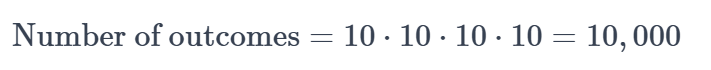

Each PIN code represents a certain arrangement where the order of the individual digits matters. Because order matters, the code 1289 is different than the code 9821, even though both are composed of the same four digits: 1, 2, 8 and 9. If the order of digits didn't matter, 1289 would be the same as 9821.

More generally, a certain arrangement where the order of the individual elements matters is called a permutation. For instance, there are 10,000 possible permutations for a 4-digit PIN code (in other words, there are 10,000 digit arrangements where the order of the digits matters).

Let's now turn our attention to another example, where we're interested in finding the total number of possible permutations for the numbers {5, 6, 7} — one possible permutation would be 567, another 657, and so on.

However, this time we want to form the permutations by sampling without replacement. For instance, if we sample once without replacement from the set {5, 6, 7} and get a 5, we don't put the 5 back in the set, and only {6, 7} remains for the second round of sampling.

To form a permutation like 567 or 657, we need to sample three times from the set {5, 6, 7}. Since we sample three times, we can break down the entire process into three experiments:

- E1, which has three possible outcomes: {5, 6, 7}
- E2, which has two possible outcomes left (because we sample without replacement we leave out the element we got at E1; if we get a 6 at E1, only {5, 7} is left for E2)
- E3, which has one possible outcome left

Using the extended rule of product, we see we have a total of six outcomes for the composite experiment E1E2E3:

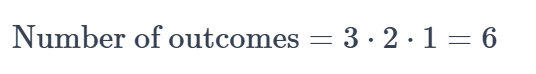

This makes sense, since these are all the possible permutations (arrangements) of {5, 6, 7} when we sample without replacement: 567, 576, 657, 675, 756, 765.

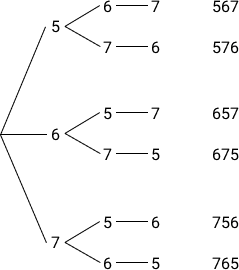

More generally, if there are n outcomes for the first experiment, (n-1) outcomes for the second, (n-2) for the third, ..., and only one outcome for the last experiment, then we can find the number of permutations using the formula:

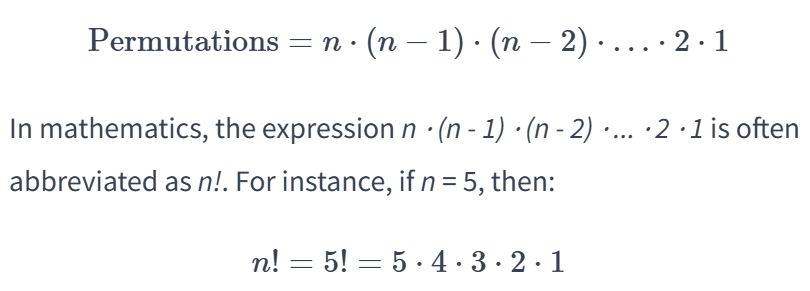

The expression n! is called a factorial and is read as "n factorial". For 5!, we read "five factorial".

For our case above with finding the total number of permutations for {5, 6, 7}, n = 3. To find the total number of permutations we use:

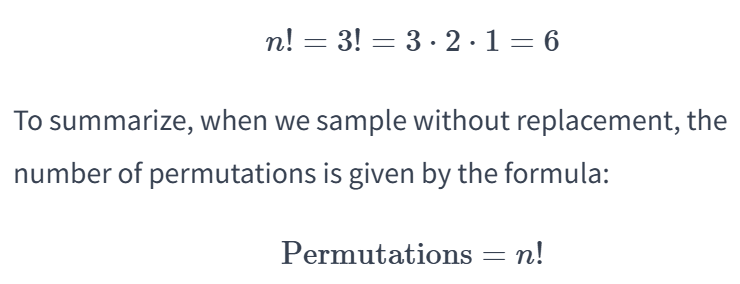

We're now going to do an exercise and resume the discussion about permutations on the next screen.

1. Write a function named factorial() which takes as input a number n and computes the factorial of that number n. There's more than one way to code this function, so we'll leave this exercise open — check the hint section if you get stuck.

2. Use the factorial() function to find the total number of permutations (arrangements where order matters) for the letters "a", "b", "j", "k", "x", "y" (the letters cannot be repeated — this is equivalent to sampling without replacement from the set {"a", "b", "j", "k", "x", "y"}. Assign your answer to permutations_1.

3. Use the factorial() function to find the total number of permutations for the 52 cards of a standard 52-card deck. Assign your answer to permutations_2.

In [152]:
def factorial(n):
    tot = 1
    for i in range(1, n+1):
        tot *= i
    return tot
permutations_1 = factorial(6)
permutations_2 = factorial(52)

In [155]:
permutations_1 = factorial(6)

In [156]:
permutations_2 = factorial(52)

## More About Permutations

In the last exercise, we calculated the number of permutations for the 52 cards of a standard 52-card deck. In practice, however, we're usually interested in finding the number of permutations for a limited number of cards.

In the last exercise, we calculated the number of permutations for the 52 cards of a standard 52-card deck. In practice, however, we're usually interested in finding the number of permutations for a limited number of cards.58955 

For instance, in Texas hold 'em, which is a variation of poker, players are interested in having a winning 5-card poker hand. To find the total number of possible permutations for a 5-card poker hand, we can start by considering we're sampling without replacement five times from a standard 52-card deck:

- E1 — we have 52 cards in the deck, so 52 outcomes are possible
- E2 — we have 51 cards left in the deck, so 51 outcomes are possible (because we sample without replacement, we don't put back in the deck the card we got at E1)
- E3 — we have 50 cards left in the deck, so 50 outcomes are possible
- E4 — we have 49 cards left in the deck, so 49 outcomes are possible
- E5 — we have 48 cards left in the deck, so 48 outcomes are possible

We can use the extended rule of product to calculate the number of permutations for a 5-card poker hand:

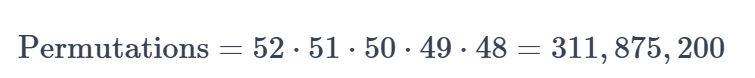

Note that we can't use the Permutations = n! formula to calculate the number of permutations for a 5-card poker hand because in our case n = 52, and that'd lead us to a wrong result:

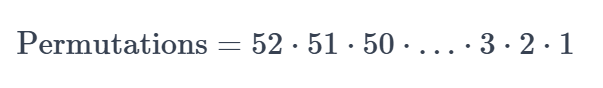

More generally, when we have a group of n objects, but we're taking only k objects, the number of permutations (which we abbreviate as "P") is:

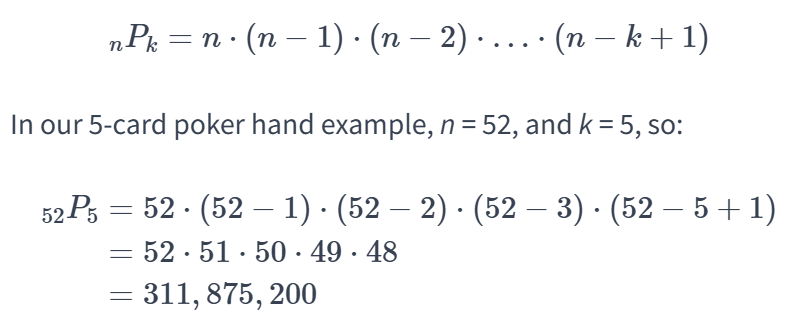

We're now going to do a quick exercise, and then discuss more about the formula we just learned.

Using the formula we just learned, calculate:

1. The number of permutations for 3-card hand when we're drawing without replacement from a 52-card standard deck. Assign your answer to perm_3_52.
2. The number of permutations for a 4-card hand when we're drawing without replacement from a 20-card deck. Assign your answer to perm_4_20.
3. The number of permutations for 4-card hand when we're drawing without replacement from a 27-card deck. Assign your answer to perm_4_27.

In [157]:
perm_3_52 = 52 * 51 * 50
perm_4_20 = 20 * 19 * 18 * 17
perm_4_27 = 27 * 26 * 25 * 24


## Permutations Formulas

On the last screen, we learned to use the formula below to calculate permutations when we're sampling without replacement and taking only k objects from a group of n objects:

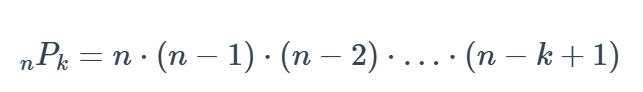

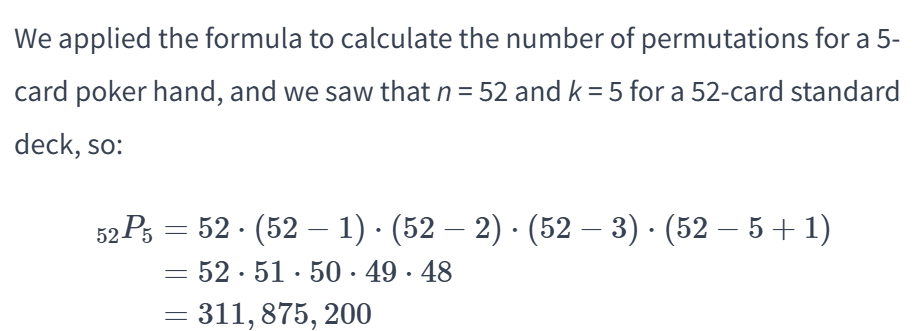

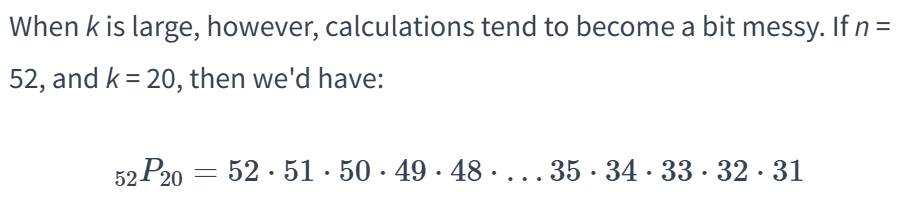

To make calculations neater, the formula above is oftentimes written in terms of factorials:

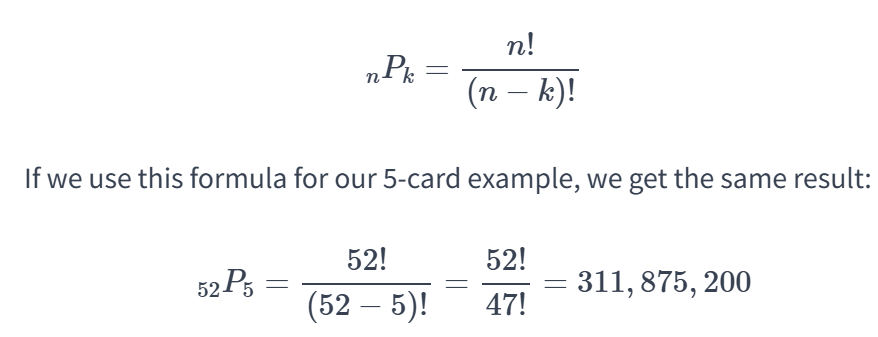

To see how this new formula is equivalent to the initial one, let's extend the numerator and the denominator:

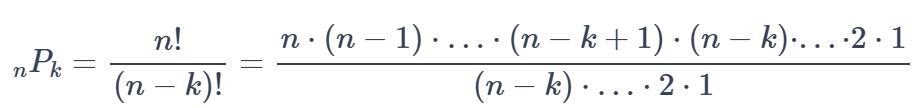

If we cancel out the similar terms in the numerator and the denominator, we are left with the initial formula:



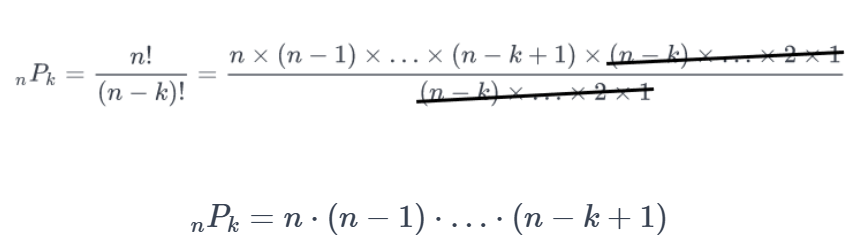

Let's now write a function for this formula and find the answer to a probability problem.

1. Write a function named permutation() which takes in two inputs (n and k) and outputs the number of permutations when we're taking only k objects from a group of n objects. To simplify your work, use the factorial() function we wrote on a previous screen.

2. A password manager software generates 16-character passwords from a list of 127 characters (the list contains numbers, letters, or other symbols). Assume the sampling from the list is done randomly and without replacement, and find the probability of cracking a password generated by this software if we're using the password "@*AmgJ(UL3Yl726x", which has 16 characters. Assign your answer to p_crack_pass.

In [158]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

In [160]:
def permutation(n, k):
    return factorial(n) / factorial(n-k)
    
p_crack_pass = permutation(127, 16)

1.7088718675919958e+33

## Unique Arrangements

Previously, we mentioned players in Texas hold 'em are interested in having a winning 5-card poker hand. To find the number of permutations for a 5-card poker hand, we learned to use this formula:

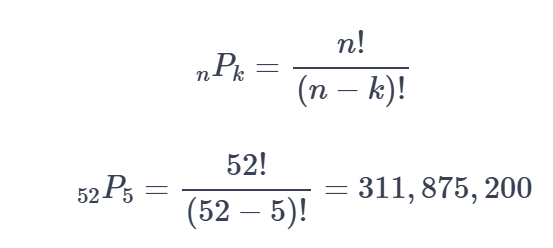

However, remember that a permutation is an arrangement of elements where order matters. The three 5-card hands we see below, for instance, have the same cards and yet are considered different permutations (arrangements) because order matters.

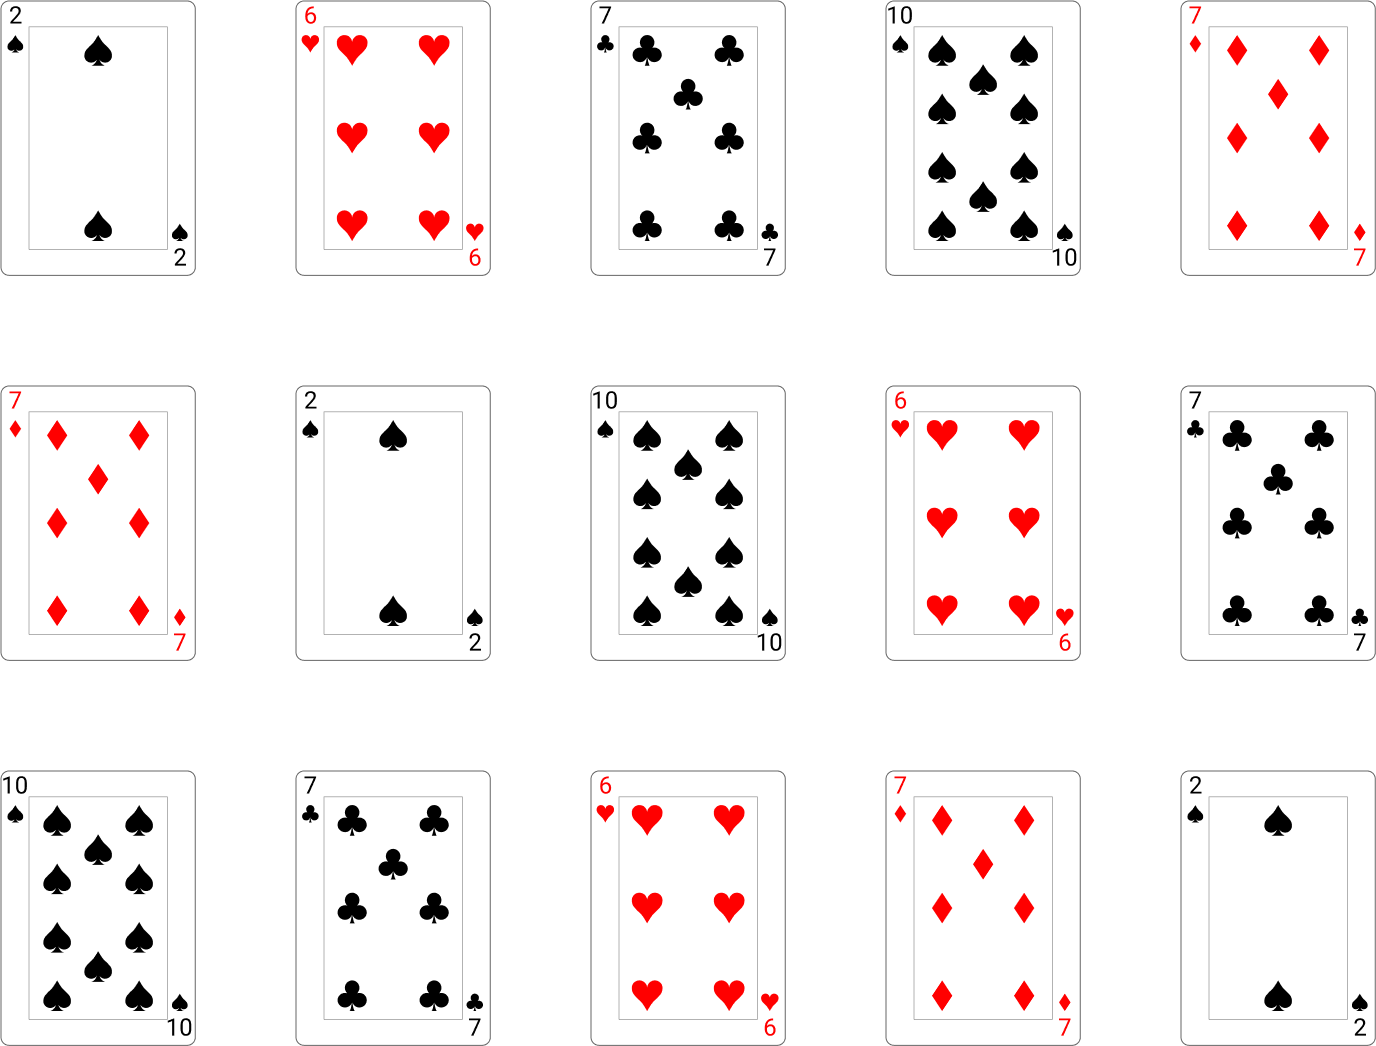

In a poker game, however, the order of cards is not important, so the three hands above would be considered identical. Consequently, we might be interested instead in ignoring the order and finding the number of unique card arrangements.

To find the number of unique card arrangements, we begin with the observation that each unique 5-card arrangement has 5! = 120 permutations. In other words, the five cards of a unique hand can be ordered in 120 different ways. In the diagram above, we see just three out the 120 permutations of that unique hand.

If each unique hand can be arranged in 5! = 120 ways and there are C total unique hands, then C ⋅ 5! gives us the total number of permutations of a 5-card hand:

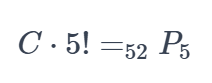

Now finding the number of unique 5-card hands means finding C in the equation above. Using a little algebra, we isolate C on the left side of the equal sign:

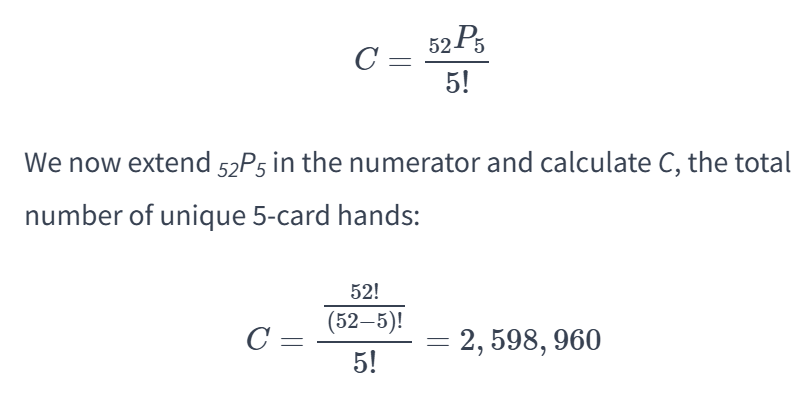

We can see the number of unique 5-card hands (2,598,960) is much lower than the number of permutations of all 5-card hands (311,875,200). Let's now do an exercise and use what we found to calculate some probabilities. We'll discuss more about unique arrangements on the next screen.

1. Use the factorial() and permutation() functions to calculate the number of unique 5-card arrangements when drawing without replacement from a standard 52-card deck. Assign your answer to a variable named c.

2. Calculate the probability of getting a 5-card hand with four aces and a seven of diamonds (assume we're drawing randomly and without replacement from the deck). Assign your answer to p_aces_7.

3. For a state lottery, six numbers are drawn randomly and without replacement from a set containing numbers from 1 to 49. Using the factorial() and the permutation() functions, find the total number of unique 6-number arrangements that could result. Assign your answer to c_lottery.

4. Calculate the probability of winning the big prize for this state lottery provided you use the numbers (3, 20, 37, 44, 45, 49) — the big prize means the numbers match exactly those resulted from the official drawing.

    - Assign your answer to p_big_prize.
    - Print p_big_prize to see what are the chances of winning the big prize and think whether you'd recommend spending money on lottery to a close friend.

In [168]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

def permutation(n, k):
    numerator = factorial(n)
    denominator = factorial(n-k)
    return numerator/denominator

c = permutation(52, 5) / factorial(5)

p_aces_7 =  1/c

c_lottery = permutation(49, 6) / factorial(6)
p_big_prize = 1/c_lottery
print(p_big_prize)

7.151123842018516e-08


## Combinations

On the previous screen, we made the observation that in a poker game the order in which the cards are arranged in a 5-card hand doesn't matter. We saw, for instance, that these three different arrangements would be considered identical in a poker game:

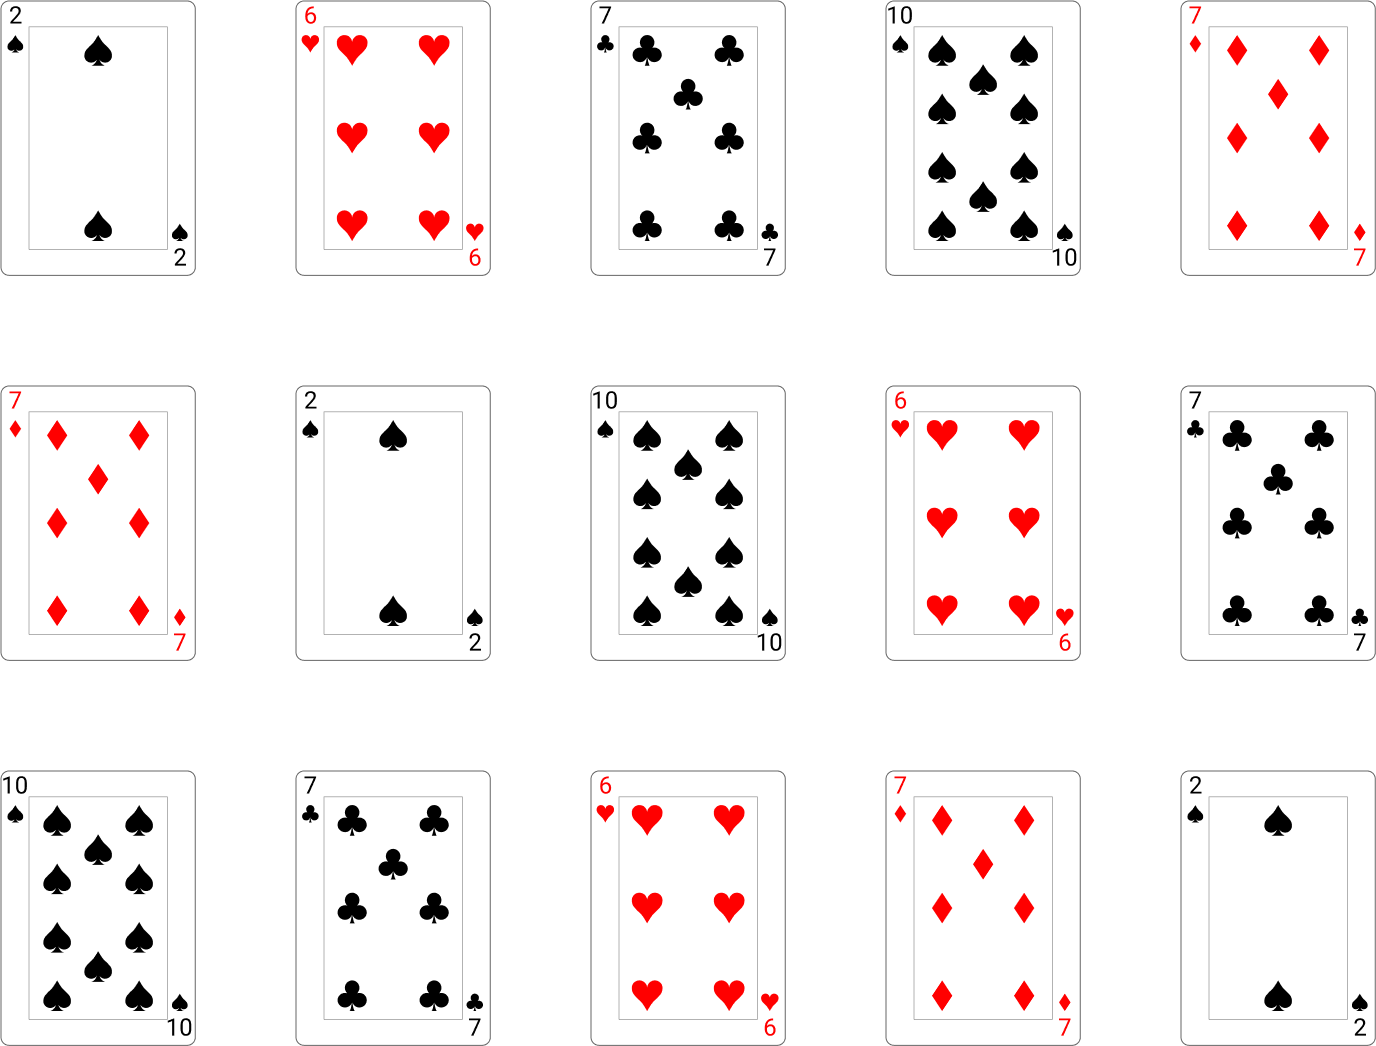

More generally, if the order of the elements in an arrangement doesn't matter, the arrangement is called a combination. Combinations are the opposite of permutations; the order of the elements does not matter for combinations, whereas the order does matter for permutations.

To sum it up, we have two kinds of arrangements:

- Arrangements where the order matters, which we call permutations.
- Arrangements where the order doesn't matter, which we call combinations.

On the previous screen, we used the technique below to calculate the number of combinations of a 5-card hand:

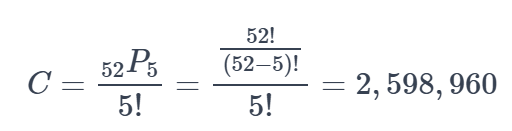

We need to transform this technique into a general formula that we can use to calculate combinations for any kind of situation, not just 5-card poker hands.

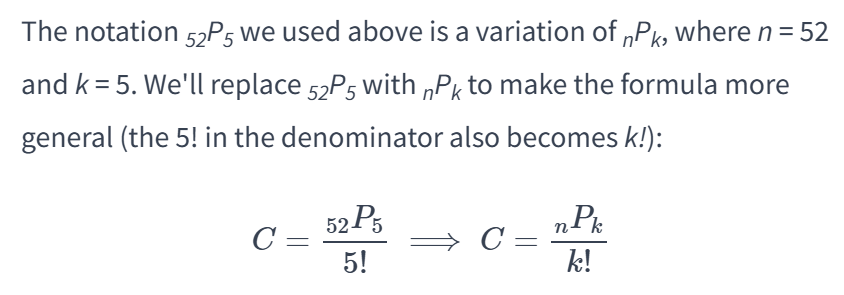

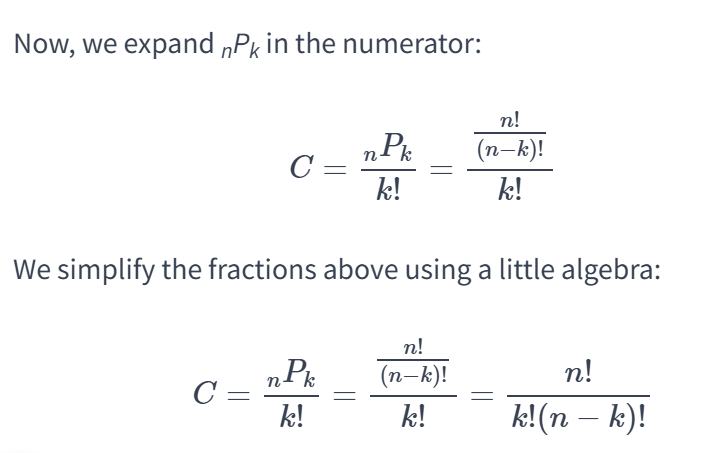

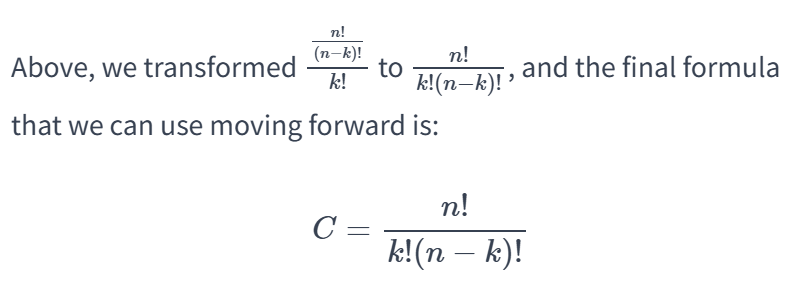

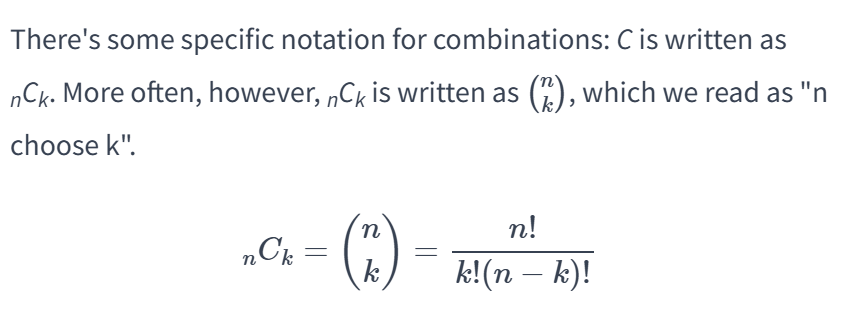

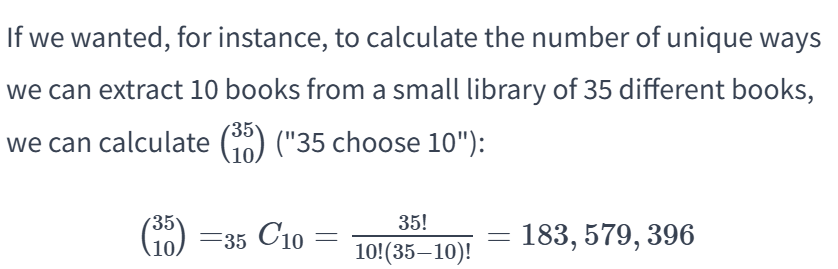

Let's now write a function for our formula above, solve a probability problem, and wrap up this lesson on the next screen.

1. Write a function named combinations() which takes in two inputs (n and k) and outputs the number of combinations when we're taking only k objects from a group of n objects. To simplify your work, use the factorial() function we wrote on a previous screen.

2. A small company is interested in running an A/B test and is about to select a group of 18 customers out of a total of 34 customers. Find the number of unique ways in which 18 customers can be selected from a group of 34 and assign your result to c_18.

3. One of the possible outcomes is group Y, which is a group formed by 18 customers. Assume all the outcomes have equal chances of occurring and calculate the probability of getting a group other than group Y. Assign your answer to p_non_Y.

In [169]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

def combinations(n, k):
    return factorial(n) /(factorial(n-k) * factorial(k))

c_18 = combinations(34, 18)
p_non_Y = 1 - (1/c_18)

In this lesson, we focused on learning a few counting techniques that enable us to calculate the number of outcomes associated with various experiments. We started with the rule of product, which is a fundamental counting technique. We then used the rule of product to develop more advanced counting techniques that enable us to calculate the number of permutations and combinations.

Next in this course is a guided project, where we're going to use what we've learned to build the logic of an app that is meant to help people fight lottery addiction.

## Permutations and Combinations Practice Problems

We're going to start with a few exercises about theory.

Evaluate the truth value of the following sentences.

- If we sample four times from the set {2, 3, 5, 7, 11, 13}, the number of possible outcomes is greater if we sample with replacement (compared to sampling without replacement). Assign the boolean True or False to sentence_1.
- If we sample two times from the set {19, 23, 29, 31}, the possible arrangements we can get are called combinations if the order doesn't matter. Assign the boolean True or False to sentence_2.
- If we wanted to calculate the number of unique 5-card hands we can get from a standard 52-card deck, we'd basically need to calculate the number of permutations. Assign the boolean True or False to sentence_3.

In [171]:
sentence_1 = True
sentence_2 = True
sentence_3 = False

## The Rule of Product

On the previous screen, we answered a few theoretical questions. Moving forward, we're going to solve practical exercises. Let's start with reminding ourselves the rule of product.

If we have an experiment E1 (like flipping a coin) with a outcomes, followed by an experiment E2 (like rolling a die) with b outcomes, then the total number of outcomes for the composite experiment E1E2 can be found by multiplying a with b:

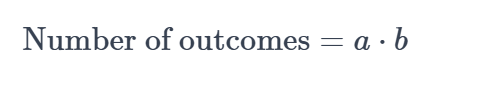

Recall we can extend the rule of product for any number of experiments. If we have an experiment E1 with a outcomes, followed by an experiment E2 with b outcomes, followed by an experiment En with z outcomes, the total number of outcomes for the composite experiment E1E2 ... En can be found by multiplying their individual outcomes:

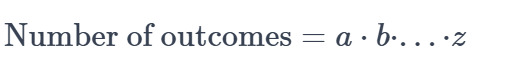

Let's now practice using the rule of product.

- The the number of possible permutations for a 3-digit code that is formed from integers from 0 to 9 (digit repetition is allowed). Assign your answer to code_permutations.
- Find the probability of cracking that 3-digit code using the code 228. Assign your answer to p_228.
- We flip a fair coin twice, roll a six-sided die, and then flip a biased coin (there's a higher probability of getting tails than getting heads). Find the number of possible outcomes of this composite experiment and assign your answer to n_outcomes.

In [172]:
code_permutations = 10 * 10 * 10
p_228 = 1/ code_permutations
n_outcomes = 2 * 2 * 6 

## More Rule of Product Exercises

On the previous screen, we solved a few exercises using the rule of product.

One of the exercises was about finding the number of possible permutations for a 3-digit code that is formed from integers from 0 to 9 (digit repetition is allowed). We'll continue working with this example in the following exercise.

1. Find the probability of cracking the code using the codes 228, 926, 124 (so you have three attempts). Assume the three attempts (events) are independent, so finding out 228 is wrong doesn't change the probability that 926 is successful. Assign your answer to p_three_attempts.

2. After three consecutive wrong attempts, you get locked and cannot try another code for 24 hours. Assume the individual attempts are independent of one another and find the probability of getting locked. Assign your answer to p_locked.

You can use the addition rule for the first exercise to calculate P(228 ∪ 926 ∪ 124). The three events are independent and mutually exclusive.
The probability of getting locked is the probability of using a wrong code three times in a row. You'll need to use the multiplication rule.
Start by thinking what's the probability of using a wrong code for a single attempt.

In [174]:
# The number of code permutations is 1000
p_three_attempts = 1/1000 + 1/1000 + 1/1000 
p_locked = 999/1000 * 999/1000 * 999/1000

In [173]:
p_three_attempts = 3/1000
p_locked = 1 - p_three_attempts

## Permutations, Combinations, Sampling

On the previous two screens, we focused on solving exercises using the rule of product and probability rules. On this screen, we're going to code a few functions.

When we sample without replacement, we can calculate the number of permutations using this formula:

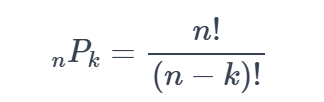

When we sample without replacement, we can calculate the number of combinations using this formula:

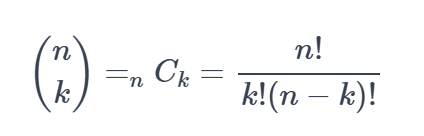

Let's now code two Python functions corresponding to these formulas.

Using the factorial() function you already see in the code editor:

1. Write a function named permutations() which takes in two inputs (n and k) and outputs the number of permutations when we're taking only k objects from a group of n objects.

2. Write a function named combinations() which takes in two inputs (n and k) and outputs the number of combinations when we're taking only k objects from a group of n objects.

Using either permutations() or combinations():

1. Calculate the number of ways we can extract 12 books from a small library of 41 different books (the order doesn't matter and we're sampling without replacement). Assign your answer to n_arrangements_non_ordered.

2. Calculate the number of ways we can extract 12 books from a small library of 41 different books (the order matters and we're sampling without replacement). Assign your answer to n_arrangements_ordered.

3. Print n_arrangements_non_ordered and n_arrangements_ordered.

In [176]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

def permutations(n, k):
    return factorial(n) / factorial(n-k)

def combinations(n, k):
    return permutations(n, k) / factorial(k)

n_arrangements_non_ordered = combinations(41, 12)
n_arrangements_ordered = permutations(41, 12)
print(n_arrangements_non_ordered)
print(n_arrangements_ordered)

7898654920.0
3.783468344527872e+18


## Mixed Practice Problems

On the previous screens, we coded two functions: permutations() and combinations(). On this screen, we're going to use these functions to solve more exercises.

Consider the set containing the letters {A, C, E, G, I, L, N, P, R, T, Y}. Calculate the number of five-letter arrangements if:

1. Calculate the total number of letters in the set. Assign your answer to n_letters.
2. The order doesn't matter and we're sampling without replacement. Assign your answer to not_ordered.
3. The order matters and we're sampling with replacement. Assign your answer to ordered_with_replacement.
4. The order matters and we're sampling without replacement. Assign your answer to ordered_without_replacement.

In [177]:
letters_set = {'A', 'C', 'E', 'G', 'I', 'L',
               'N', 'P', 'R', 'T', 'Y'}

In [179]:
n_letters = len(letters_set)
n_letters

not_ordered = combinations(11, 5)

ordered_with_replacement = 11 ** 5
ordered_without_replacement. = permutations(11, 5)

11

## Mixed Practice Problems 2

On the previous screen, we focused on calculating the number of five-letter arrangements we can get from the set {A, C, E, G, I, L, N, P, R, T, Y}.

On this screen, we're going to calculate a few probabilities associated with this example.

Consider the set containing the letters {A, C, E, G, I, L, N, P, R, T, Y}. If we sample five times with replacement and the order of the sampled letters matters, then:

1. Calculate the probability of sampling the word "EAGLE". Assign your answer to p_eagle.
2. Calculate the probability of sampling the word "AGILE". Assign your answer to p_agile.
3. Calculate the probability of sampling "EAGLE", "AGILE", or "PEACE". Assign your answer to p_eagle_agile_peace.
4. Calculate the probability of sampling the word "LANES". Assign your answer to p_lanes.

In [180]:
letters_set = {'A', 'C', 'E', 'G', 'I', 'L',
               'N', 'P', 'R', 'T', 'Y'}
n_letters = len(letters_set)
not_ordered = combinations(n_letters, 5)
ordered_with_replacement = n_letters**5
ordered_without_replacement = permutations(n_letters, 5)

p_eagle = 1/ ordered_with_replacement
p_agile =  1 / ordered_with_replacement
p_eagle_agile_peace = 3/ordered_with_replacement
p_lanes = 0